# CRIME ANALYSIS and PREDICTION using LOGISTIC REGRESSION

## Importing libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
import folium
import webbrowser
from PIL import Image

In [142]:
link="C:/Users/HP/Desktop/mlpython/Project_crime/"
dirlist=os.listdir(link)
print(dirlist)

['Chicago2001-2004.csv', 'Chicago2005-2007.csv', 'Chicago2008-2011.csv', 'Chicago2012-2017.csv', 'Crimes_-_2001_to_present.csv']


## Importing Dataset

In [143]:
c0104=pd.read_csv(link+dirlist[0])
c0507=pd.read_csv(link+dirlist[1])
c0811=pd.read_csv(link+dirlist[2])
c1217=pd.read_csv(link+dirlist[3])
c1719=pd.read_csv(link+dirlist[4])

## Data Cleaning

In [144]:
c0104smooth=c0104.dropna(axis=1)
c0104smooth.isna().sum()
c0104smooth=c0104smooth[1:]
print(len(c0104smooth))
c0104.describe().to_csv(link+"Clean_data_01_04.csv")
c0104smooth.head()

1048574


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On
1,2544,4676906,HM278933,03-01-2003 00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,935,9,26,2003,04/15/2016 08:55:02 AM
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,False,1413,14,20,2004,08/17/2015 03:03:40 PM
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,2521,25,6,2004,08/17/2015 03:03:40 PM
4,3302,4677901,HM275615,05-01-2003 01:00,111XX S NORMAL AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,2233,22,6,2003,04/15/2016 08:55:02 AM
5,3633,4838048,HM440266,08-01-2004 00:01,012XX S HARDING AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,1011,10,6,2004,08/17/2015 03:03:40 PM


In [145]:
c0507smooth=c0507.dropna(axis=1)
c0507smooth.isna().sum()
c0507smooth=c0507smooth[1:]
print(len(c0507smooth))
c0507.describe().to_csv(link+"Clean_data_05_07.csv")
c0507smooth.head()

1048574


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,True,False,321,18,2006,04/15/2016 08:55:02 AM
2,2,4673628,HM113861,01-08-2006 23:16,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,False,False,321,04A,2006,04/15/2016 08:55:02 AM
3,4,4673629,HM274049,04-05-2006 18:45,061XX W NEWPORT AVE,460,BATTERY,SIMPLE,False,False,1633,08B,2006,04/15/2016 08:55:02 AM
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,822,18,2006,04/15/2016 08:55:02 AM
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,560,ASSAULT,SIMPLE,True,False,734,08A,2006,04/15/2016 08:55:02 AM


In [146]:
c0811smooth=c0811.dropna(axis=1)
c0811smooth.isna().sum()
c0811smooth=c0811smooth[1:]
print(len(c0811smooth))
c0811.describe().to_csv(link+"Clean_data_08_11.csv")
c0811smooth.head()

1048574


,Unnamed: 0,ID,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,835,4786,10-09-2008 03:30,048XX W POLK ST,110,HOMICIDE,FIRST DEGREE MURDER,True,False,1533,01A,2008,08/17/2015 03:03:40 PM
2,1334,4787,10-09-2008 08:35,030XX W MANN DR,110,HOMICIDE,FIRST DEGREE MURDER,False,False,831,01A,2008,08/17/2015 03:03:40 PM
3,1907,4788,10-10-2008 02:33,052XX W CHICAGO AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,False,1524,01A,2008,08/17/2015 03:03:40 PM
4,2436,4789,10-10-2008 12:50,026XX S HOMAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,True,1032,01A,2008,08/17/2015 03:03:40 PM
5,3056,4790,10-10-2008 20:32,015XX W 14TH ST,110,HOMICIDE,FIRST DEGREE MURDER,True,True,1231,01A,2008,08/17/2015 03:03:40 PM


In [147]:
c1217smooth=c1217.dropna(axis=1)
c1217smooth.isna().sum()
c1217smooth=c1217smooth[1:]
print(len(c1217smooth))
c1217.describe().to_csv(link+"Clean_data_12_17.csv")
c1217smooth.head()

1048574


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,313,08B,2016,05-10-2016 15:56
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,False,False,1524,24,2016,05-10-2016 15:56
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,False,False,1532,08B,2016,05-10-2016 15:56
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,False,True,1523,6,2016,05-10-2016 15:56
5,1108,10508702,HZ250447,05-03-2016 22:35,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,False,False,631,04B,2016,05-10-2016 15:56


In [148]:
c1719smooth=c1719.dropna(axis=1)
c1719smooth.isna().sum()
c1719smooth=c1719smooth[1:]
print(len(c1719smooth))
c1719.describe().to_csv(link+"Clean_data_17_19.csv")
c1719smooth.head()

418715


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code
1,11682239,JC257043,05-09-2019 23:48,011XX W ARGYLE ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,True,False,2033,15
2,11682152,JC257028,05-09-2019 23:43,031XX N SOUTHPORT AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,True,False,1933,14
3,11682140,JC257033,05-09-2019 23:40,008XX N HOMAN AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,False,False,1121,04A
4,11682150,JC257040,05-09-2019 23:37,061XX S EBERHART AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,True,False,313,18
5,11682328,JC257007,05-09-2019 23:36,011XX W 58TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,712,08B


## Subsetting

In [149]:
c1=c0104smooth.columns.tolist()
c0104smooth=c0104smooth[c1[1:]]
c0104smooth.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On
1,4676906,HM278933,03-01-2003 00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,935,9,26,2003,04/15/2016 08:55:02 AM
2,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,False,1413,14,20,2004,08/17/2015 03:03:40 PM
3,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,2521,25,6,2004,08/17/2015 03:03:40 PM
4,4677901,HM275615,05-01-2003 01:00,111XX S NORMAL AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,2233,22,6,2003,04/15/2016 08:55:02 AM
5,4838048,HM440266,08-01-2004 00:01,012XX S HARDING AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,1011,10,6,2004,08/17/2015 03:03:40 PM


In [150]:
c2=c0507smooth.columns.tolist()
c0507smooth=c0507smooth[c2[1:]]
c0507smooth.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,True,False,321,18,2006,04/15/2016 08:55:02 AM
2,4673628,HM113861,01-08-2006 23:16,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,False,False,321,04A,2006,04/15/2016 08:55:02 AM
3,4673629,HM274049,04-05-2006 18:45,061XX W NEWPORT AVE,460,BATTERY,SIMPLE,False,False,1633,08B,2006,04/15/2016 08:55:02 AM
4,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,822,18,2006,04/15/2016 08:55:02 AM
5,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,560,ASSAULT,SIMPLE,True,False,734,08A,2006,04/15/2016 08:55:02 AM


In [151]:
c3=c0811smooth.columns.tolist()
c0811smooth=c0811smooth[c3[1:]]
c0811smooth.head()

,ID,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,4786,10-09-2008 03:30,048XX W POLK ST,110,HOMICIDE,FIRST DEGREE MURDER,True,False,1533,01A,2008,08/17/2015 03:03:40 PM
2,4787,10-09-2008 08:35,030XX W MANN DR,110,HOMICIDE,FIRST DEGREE MURDER,False,False,831,01A,2008,08/17/2015 03:03:40 PM
3,4788,10-10-2008 02:33,052XX W CHICAGO AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,False,1524,01A,2008,08/17/2015 03:03:40 PM
4,4789,10-10-2008 12:50,026XX S HOMAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,True,1032,01A,2008,08/17/2015 03:03:40 PM
5,4790,10-10-2008 20:32,015XX W 14TH ST,110,HOMICIDE,FIRST DEGREE MURDER,True,True,1231,01A,2008,08/17/2015 03:03:40 PM


In [152]:
c4=c1217smooth.columns.tolist()
c1217smooth=c1217smooth[c4[1:]]
c1217smooth.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,313,08B,2016,05-10-2016 15:56
2,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,False,False,1524,24,2016,05-10-2016 15:56
3,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,False,False,1532,08B,2016,05-10-2016 15:56
4,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,False,True,1523,6,2016,05-10-2016 15:56
5,10508702,HZ250447,05-03-2016 22:35,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,False,False,631,04B,2016,05-10-2016 15:56


In [153]:
c5=c1719smooth.columns.tolist()
c1719smooth=c1719smooth[c5[1:]]
c1719smooth.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code
1,JC257043,05-09-2019 23:48,011XX W ARGYLE ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,True,False,2033,15
2,JC257028,05-09-2019 23:43,031XX N SOUTHPORT AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,True,False,1933,14
3,JC257033,05-09-2019 23:40,008XX N HOMAN AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,False,False,1121,04A
4,JC257040,05-09-2019 23:37,061XX S EBERHART AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,True,False,313,18
5,JC257007,05-09-2019 23:36,011XX W 58TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,712,08B


## Primary Analysis

### based on Top 8 crimes

In [154]:
#calculating the top 8 crimes and their count from 2001-2004 and plotting them
c0104arr=np.array(c0104smooth['Primary Type'])
c0104u=np.unique(c0104arr)
c0104key=np.unique(np.array(np.array(c0104smooth['Primary Type'])))
c0104val=np.array(c0104smooth['Primary Type'].value_counts().values)
print(c0104u[:8])
print(c0104val[:8])

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[212361 201429 120182 111094  68164  67525  56454  55793]


<BarContainer object of 8 artists>

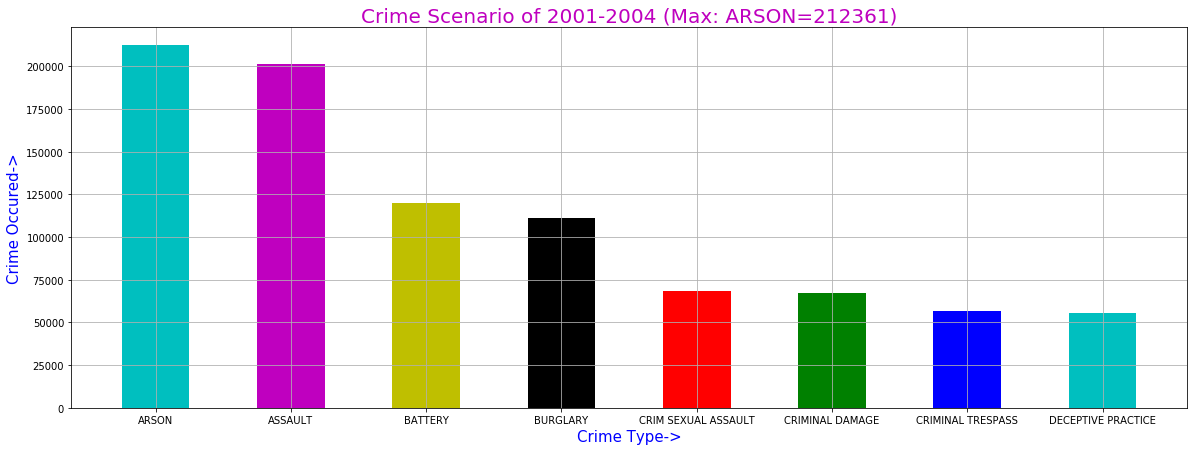

In [155]:
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001-2004 (Max: {}={})".format(c0104u[:8][0],c0104val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c0104u[:8],c0104val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[197319 190674 142127 129549  63624  61549  56481  47448]


<BarContainer object of 8 artists>

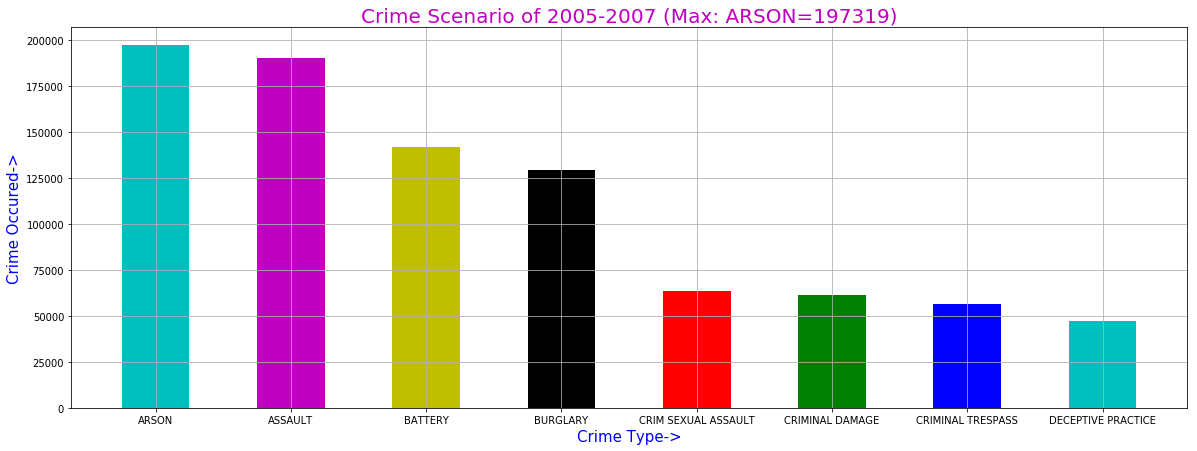

In [156]:
#calculating the top 8 crimes and their count from 2005-2007 and plotting them
c0507arr=np.array(c0507smooth['Primary Type'])
c0507u=np.unique(c0507arr)
c0507key=np.unique(np.array(np.array(c0507smooth['Primary Type'])))
c0507val=np.array(c0507smooth['Primary Type'].value_counts().values)
print(c0507u[:8])
print(c0507val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2005-2007 (Max: {}={})".format(c0507u[:8][0],c0507val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c0507u[:8],c0507val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[215423 186928 126189 118093  68323  66172  62223  45189]


<BarContainer object of 8 artists>

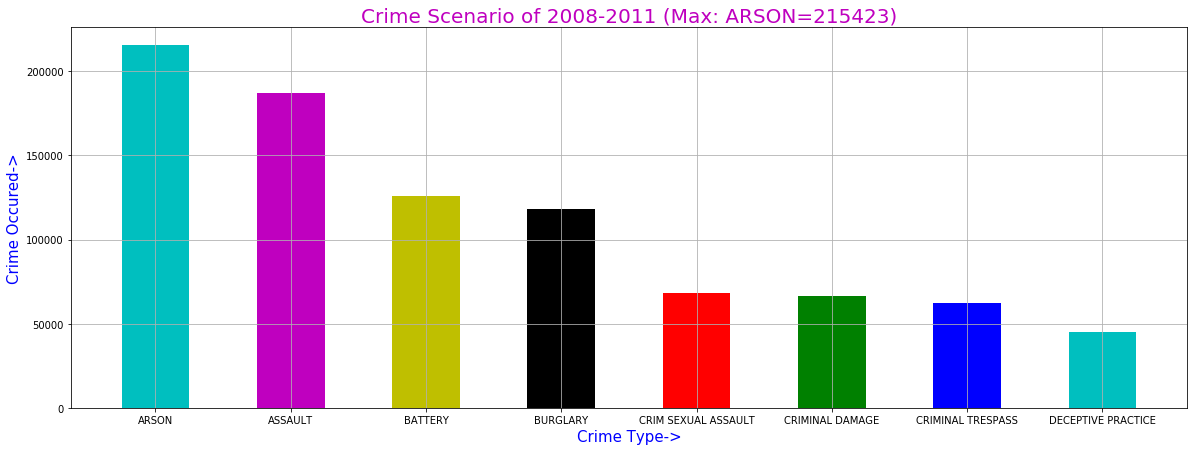

In [157]:
#calculating the top 8 crimes and their count from 2008-2011 and plotting them
c0811arr=np.array(c0811smooth['Primary Type'])
c0811u=np.unique(c0811arr)
c0811key=np.unique(np.array(np.array(c0811smooth['Primary Type'])))
c0811val=np.array(c0811smooth['Primary Type'].value_counts().values)
print(c0811u[:8])
print(c0811val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2008-2011 (Max: {}={})".format(c0811u[:8][0],c0811val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c0811u[:8],c0811val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[236724 188825 110781 109031  64049  61711  61458  48697]


<BarContainer object of 8 artists>

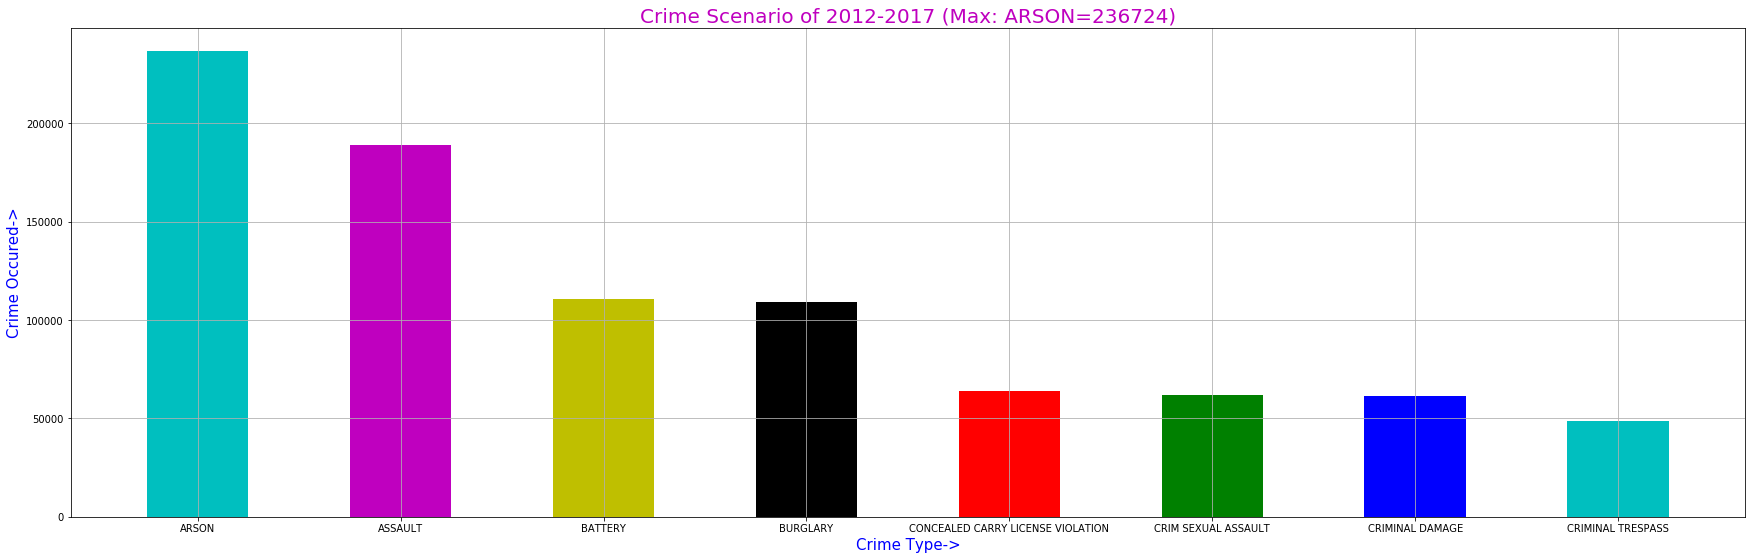

In [158]:
#calculating the top 8 crimes and their count from 2012-2017 and plotting them
c1217arr=np.array(c1217smooth['Primary Type'])
c1217u=np.unique(c1217arr)
c1217key=np.unique(np.array(np.array(c1217smooth['Primary Type'])))
c1217val=np.array(c1217smooth['Primary Type'].value_counts().values)
print(c1217u[:8])
print(c1217val[:8])
color='cmykrgb'
plt.figure(figsize=(30,9))
plt.title("Crime Scenario of 2012-2017 (Max: {}={})".format(c1217u[:8][0],c1217val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c1217u[:8],c1217val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[101596  78039  43510  31886  29552  27197  20818  18181]


<BarContainer object of 8 artists>

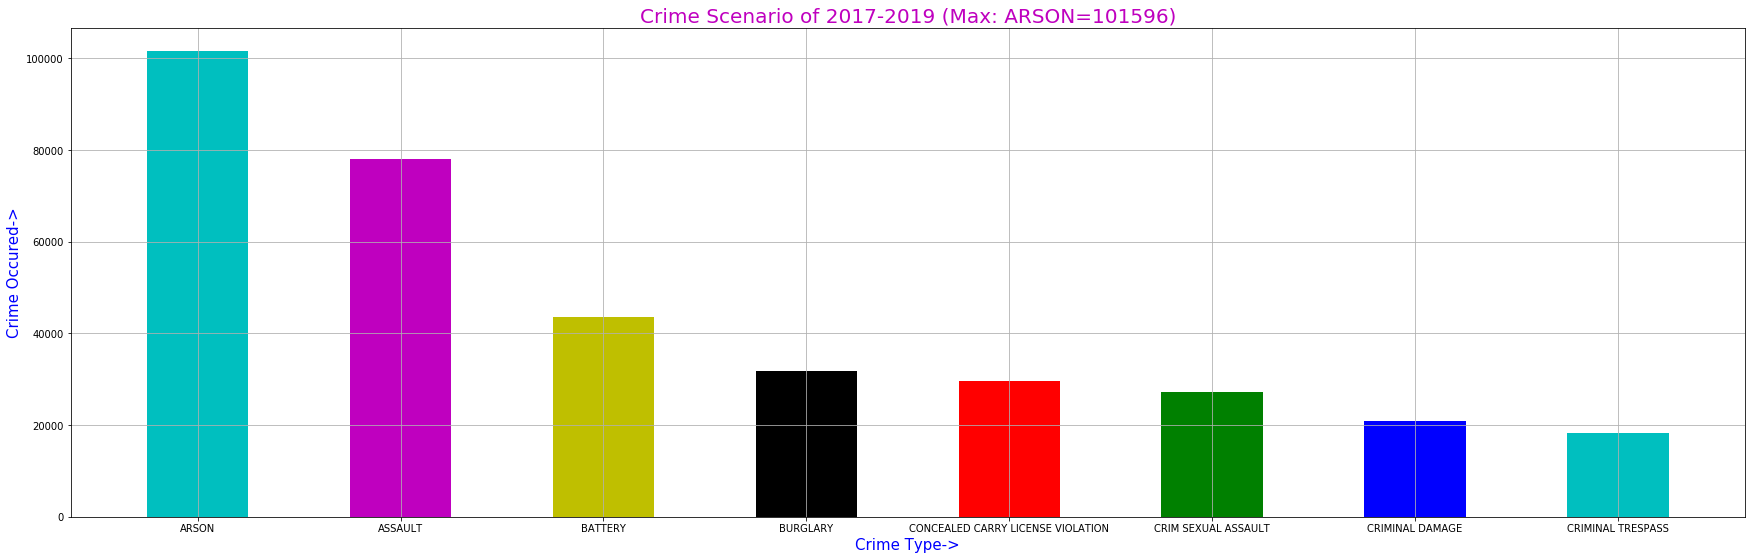

In [159]:
#calculating the top 8 crimes and their count from 2017-2019 and plotting them
c1719arr=np.array(c1719smooth['Primary Type'])
c1719u=np.unique(c1719arr)
c1719key=np.unique(np.array(np.array(c1719smooth['Primary Type'])))
c1719val=np.array(c1719smooth['Primary Type'].value_counts().values)
print(c1719u[:8])
print(c1719val[:8])
color='cmykrgb'
plt.figure(figsize=(30,9))
plt.title("Crime Scenario of 2017-2019 (Max: {}={})".format(c1719u[:8][0],c1719val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c1719u[:8],c1719val[:8],color=color,width=0.5)

## Crime based analysis

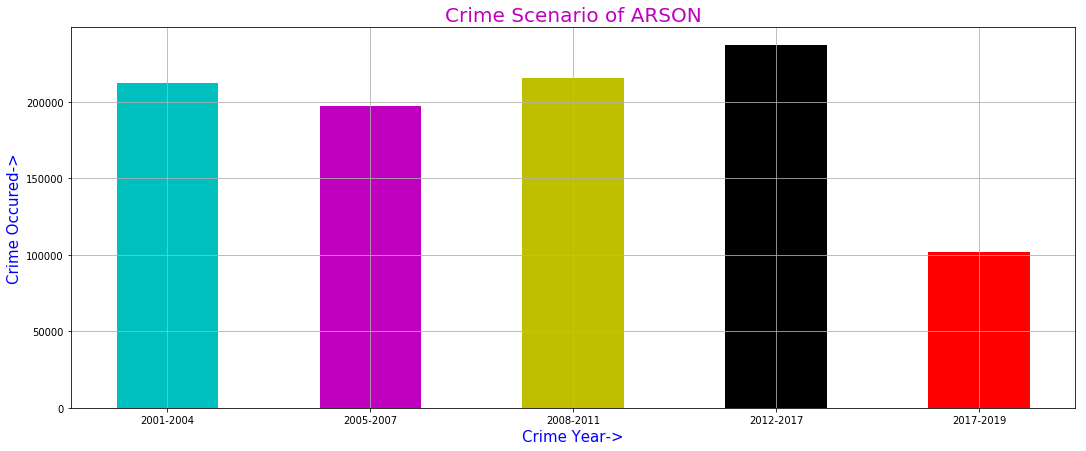

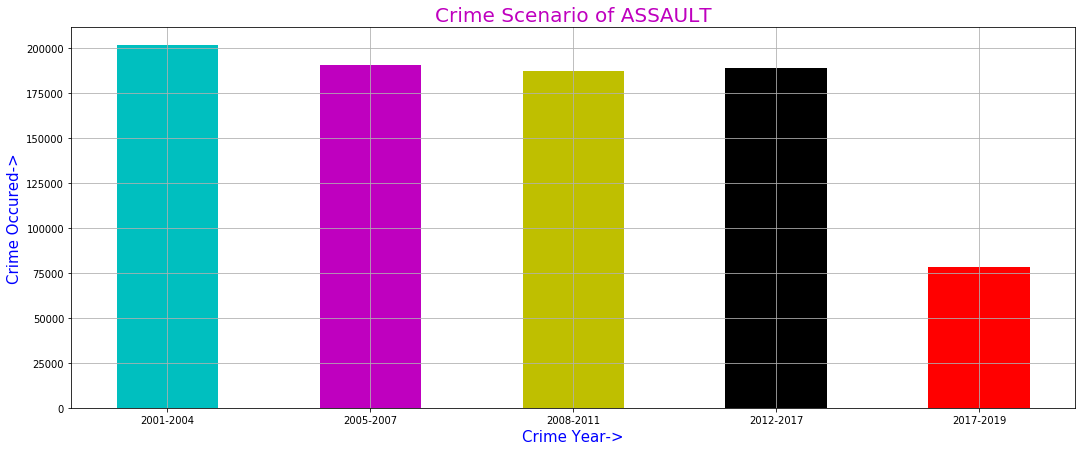

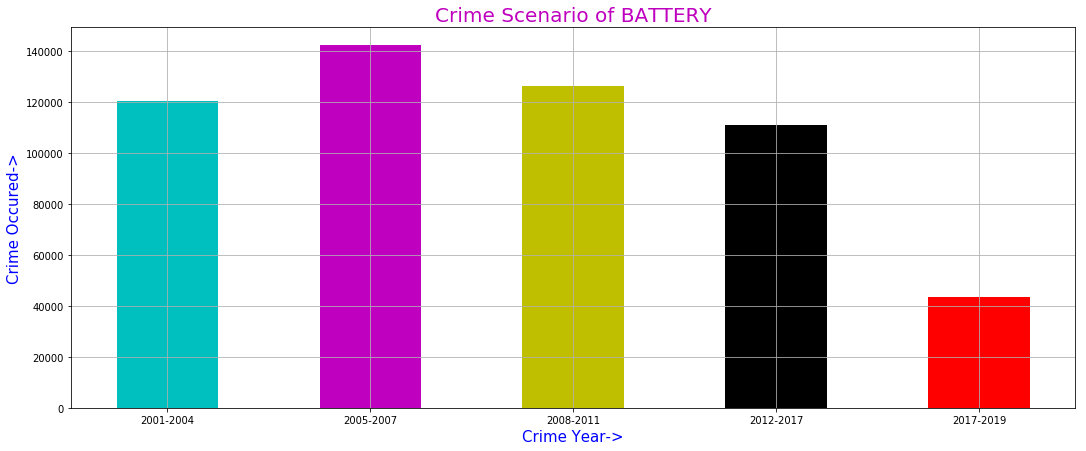

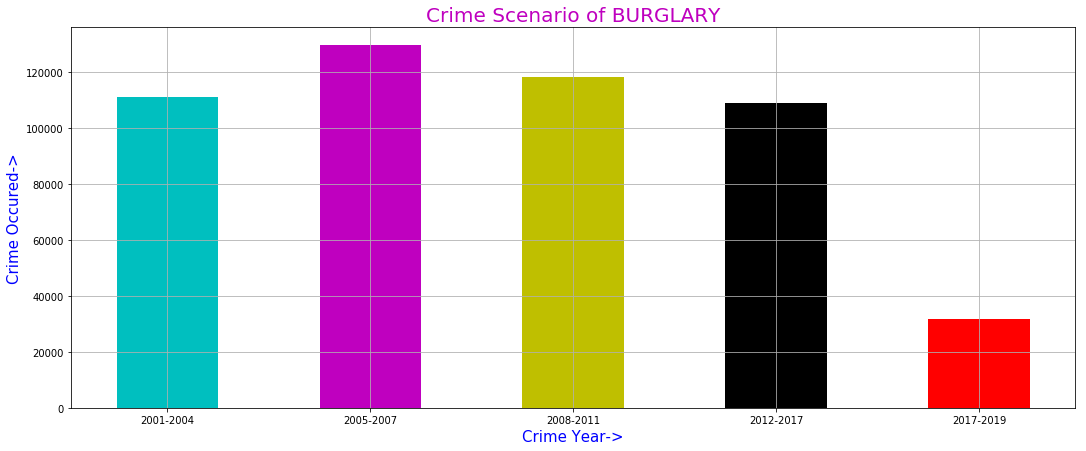

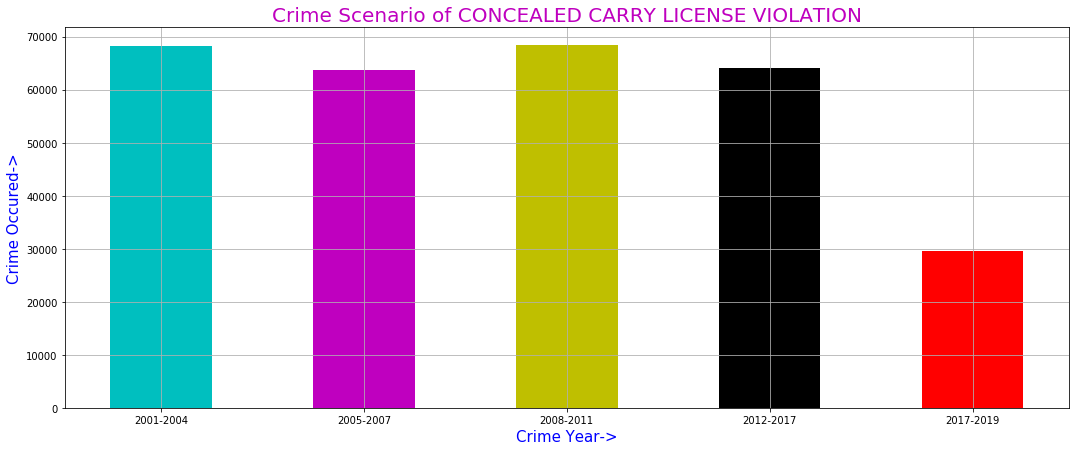

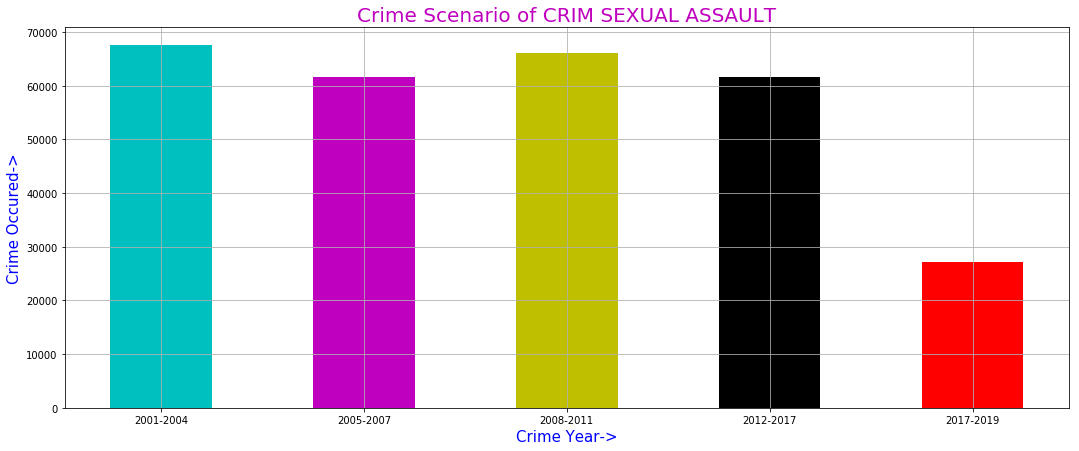

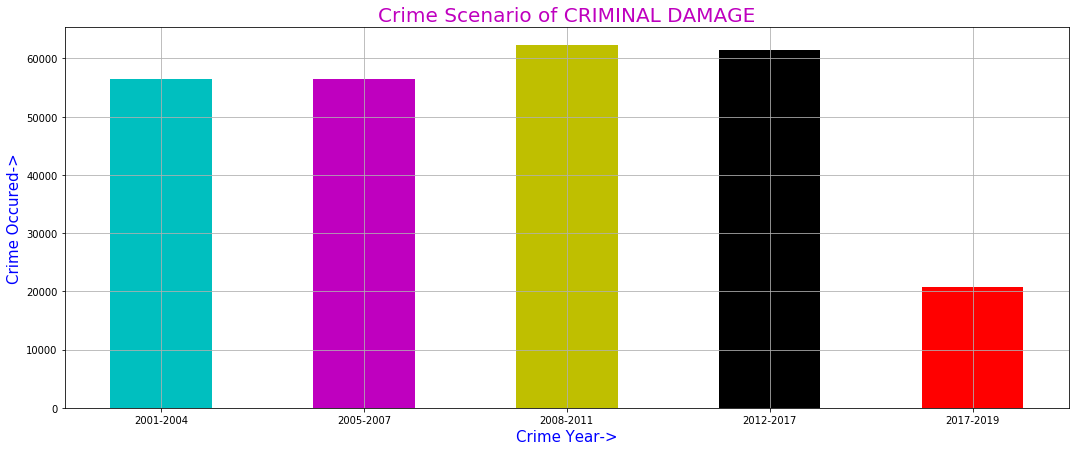

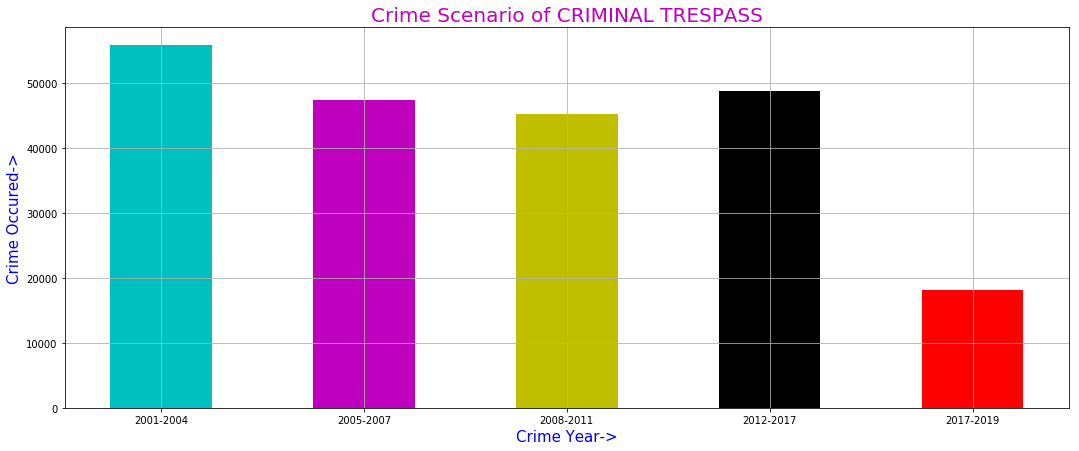

In [160]:
for i in range(len(c0104val[:8])):
    val=[c0104val[:8][i],c0507val[:8][i],c0811val[:8][i],c1217val[:8][i],c1719val[:8][i]]
    year=['2001-2004','2005-2007','2008-2011','2012-2017','2017-2019']
    color='cmykrgb'
    plt.figure(figsize=(18,7))
    plt.title("Crime Scenario of {}".format(c1719u[:8][i]),fontsize=20,color='m')
    plt.xlabel("Crime Year->",fontsize=15,color='b')
    plt.ylabel("Crime Occured->",fontsize=15,color='b')
    plt.grid()
    plt.bar(year,val,color=color,width=0.5)
    plt.savefig("C:/Users/HP/Desktop/mlpython/Project_crime/"+c1719u[:8][i])

## Year wise analysis

### 2001

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[98761 93443 55843 50564 31382 29627 27545 26008]


<BarContainer object of 8 artists>

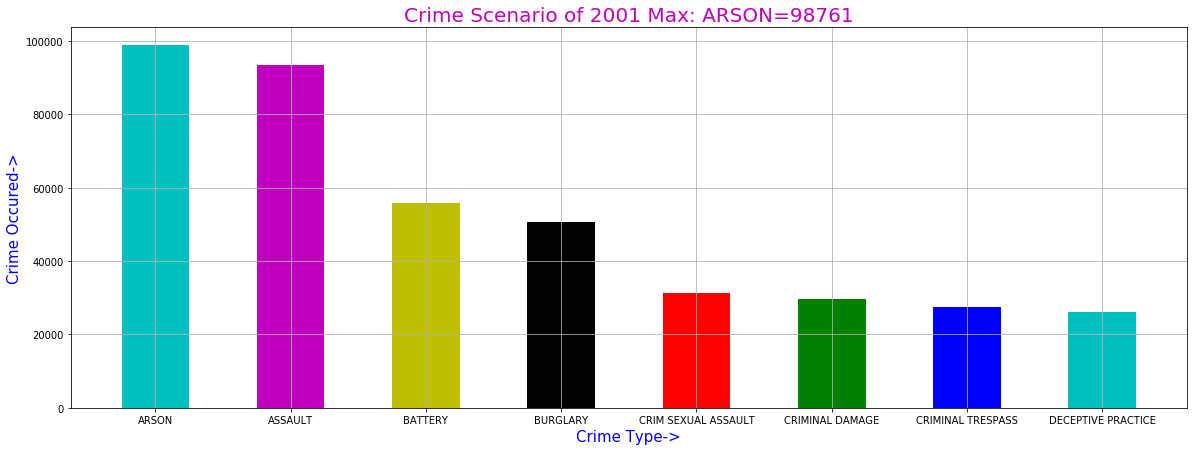

In [161]:
#CRIME scenario of 2001
c01=c0104smooth[c0104smooth['Year']==2001]
c01=c01[c01.columns.tolist()[1:]]
c01.head()
c01arr=np.array(c01['Primary Type'])
c01u=np.unique(c01arr)
c01key=np.unique(np.array(np.array(c01['Primary Type'])))
c01val=np.array(c01['Primary Type'].value_counts().values)
print(c01u[:8])
print(c01val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001 Max: {}={}".format(c01u[:8][0],c01val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c01u[:8],c01val[:8],color=color,width=0.5)

### 2002

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[97135 94081 55890 51568 32403 31494 25604 25084]


<BarContainer object of 8 artists>

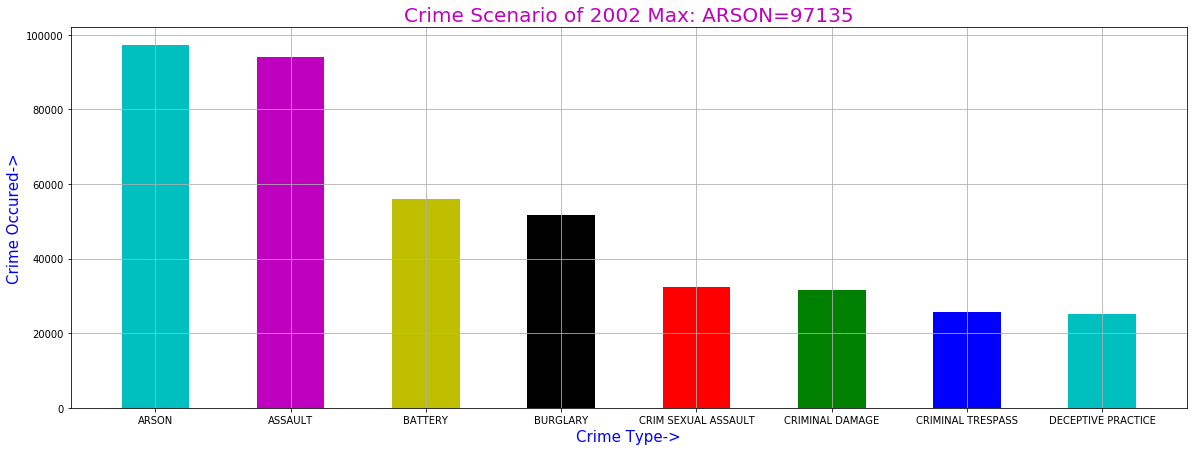

In [162]:
#CRIME scenario of 2002
c02=c0104smooth[c0104smooth['Year']==2002]
c02=c02[c02.columns.tolist()[1:]]
c02.head()
c02arr=np.array(c01['Primary Type'])
c02u=np.unique(c02arr)
c02key=np.unique(np.array(np.array(c02['Primary Type'])))
c02val=np.array(c02['Primary Type'].value_counts().values)
print(c02u[:8])
print(c02val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2002 Max: {}={}".format(c02u[:8][0],c02val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c02u[:8],c02val[:8],color=color,width=0.5)

### 2003

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[15842 13883  8890  8438  6111  4639  4172  3802]


<BarContainer object of 8 artists>

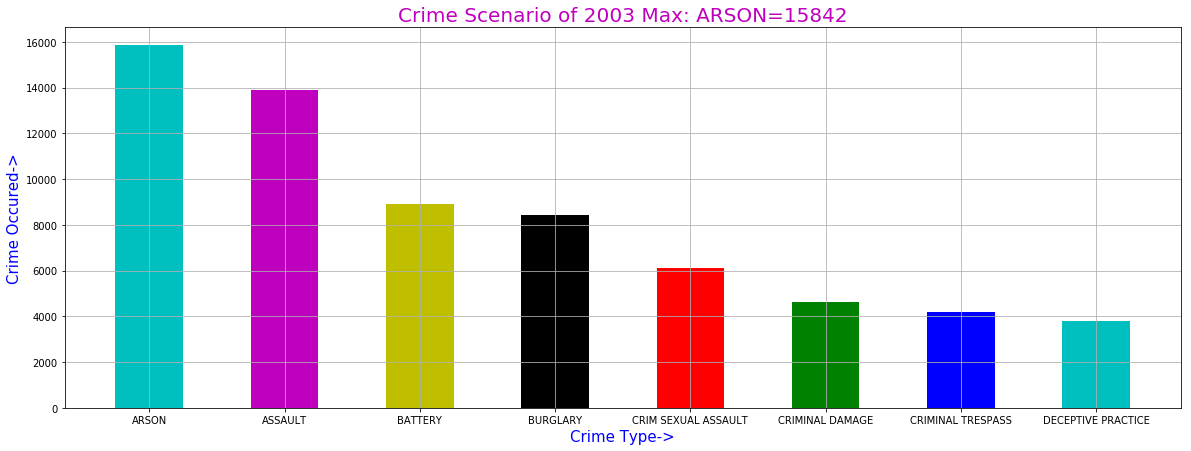

In [163]:
#CRIME scenario of 2003
c03=c0104smooth[c0104smooth['Year']==2003]
c03=c03[c03.columns.tolist()[1:]]
c03.head()
c03arr=np.array(c03['Primary Type'])
c03u=np.unique(c03arr)
c03key=np.unique(np.array(np.array(c03['Primary Type'])))
c03val=np.array(c03['Primary Type'].value_counts().values)
print(c03u[:8])
print(c03val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2003 Max: {}={}".format(c03u[:8][0],c03val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c03u[:8],c03val[:8],color=color,width=0.5)

### 2004

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[623 145 145 112  88  72  71  23]


<BarContainer object of 8 artists>

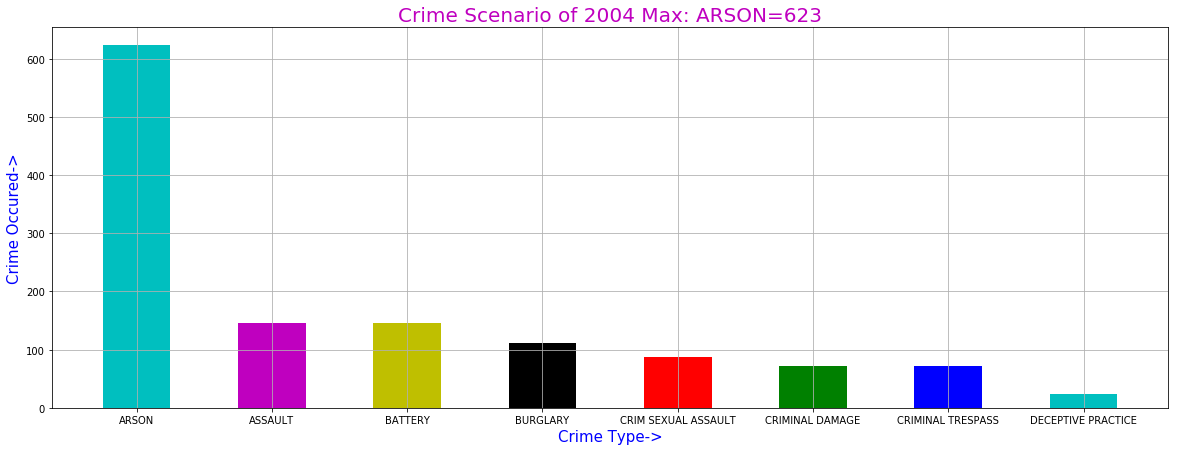

In [164]:
#CRIME scenario of 2004
c04=c0104smooth[c0104smooth['Year']==2004]
c04=c04[c04.columns.tolist()[1:]]
c04.head()
c04arr=np.array(c04['Primary Type'])
c04u=np.unique(c04arr)
c04key=np.unique(np.array(np.array(c04['Primary Type'])))
c04val=np.array(c04['Primary Type'].value_counts().values)
print(c04u[:8])
print(c04val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2004 Max: {}={}".format(c04u[:8][0],c04val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c04u[:8],c04val[:8],color=color,width=0.5)

### 2005

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[1425  510  505  280  272  226  165  154]


<BarContainer object of 8 artists>

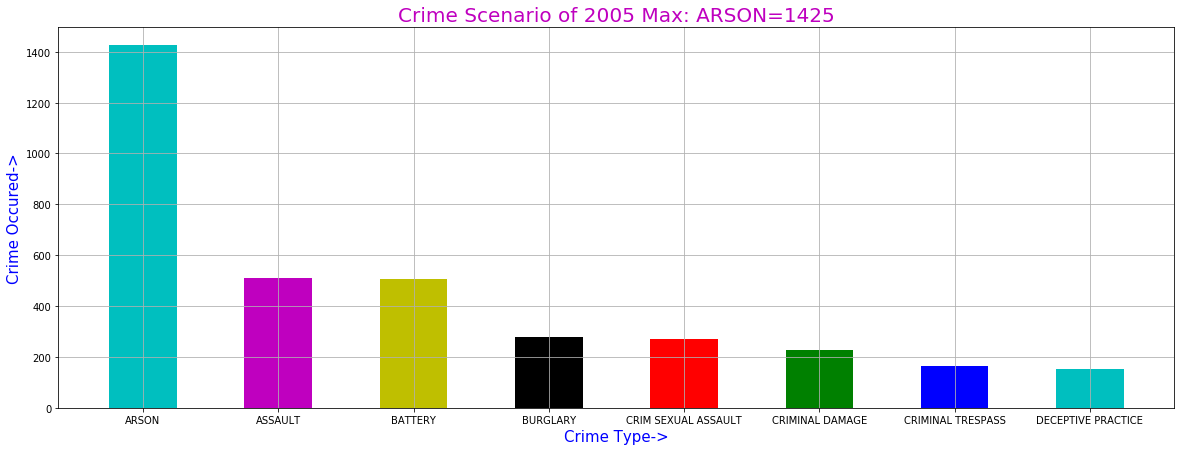

In [165]:
#CRIME scenario of 2005
c05=c0507smooth[c0507smooth['Year']==2005]
c05=c05[c05.columns.tolist()[1:]]
c05.head()
c05arr=np.array(c05['Primary Type'])
c05u=np.unique(c05arr)
c05key=np.unique(np.array(np.array(c05['Primary Type'])))
c05val=np.array(c05['Primary Type'].value_counts().values)
print(c05u[:8])
print(c05val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2005 Max: {}={}".format(c05u[:8][0],c05val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c05u[:8],c05val[:8],color=color,width=0.5)

### 2006

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[132079 123369  95967  86258  40377  39584  37485  31994]


<BarContainer object of 8 artists>

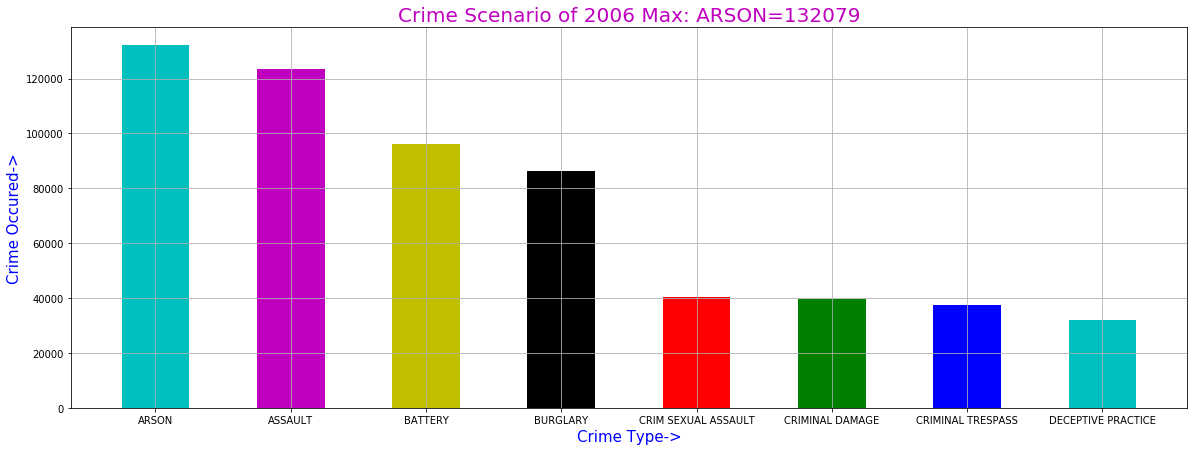

In [166]:
#CRIME scenario of 2006
c06=c0507smooth[c0507smooth['Year']==2006]
c06=c06[c06.columns.tolist()[1:]]
c06.head()
c06arr=np.array(c06['Primary Type'])
c06u=np.unique(c06arr)
c06key=np.unique(np.array(np.array(c06['Primary Type'])))
c06val=np.array(c06['Primary Type'].value_counts().values)
print(c06u[:8])
print(c06val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2006 Max: {}={}".format(c06u[:8][0],c06val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c06u[:8],c06val[:8],color=color,width=0.5)

### 2007

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[66795 63815 45934 43019 22967 21821 18850 15300]


<BarContainer object of 8 artists>

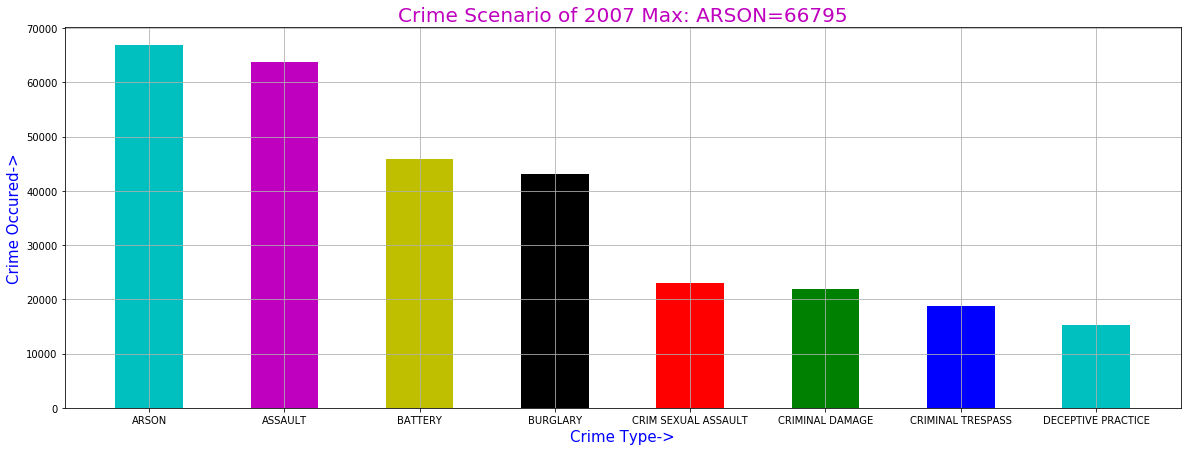

In [167]:
#CRIME scenario of 2007
c07=c0507smooth[c0507smooth['Year']==2007]
c07=c07[c07.columns.tolist()[1:]]
c07.head()
c07arr=np.array(c07['Primary Type'])
c07u=np.unique(c07arr)
c07key=np.unique(np.array(np.array(c07['Primary Type'])))
c07val=np.array(c07['Primary Type'].value_counts().values)
print(c07u[:8])
print(c07val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2007 Max: {}={}".format(c07u[:8][0],c07val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c07u[:8],c07val[:8],color=color,width=0.5)

### 2008

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[88423 75917 52838 46506 26530 26213 25445 18878]


<BarContainer object of 8 artists>

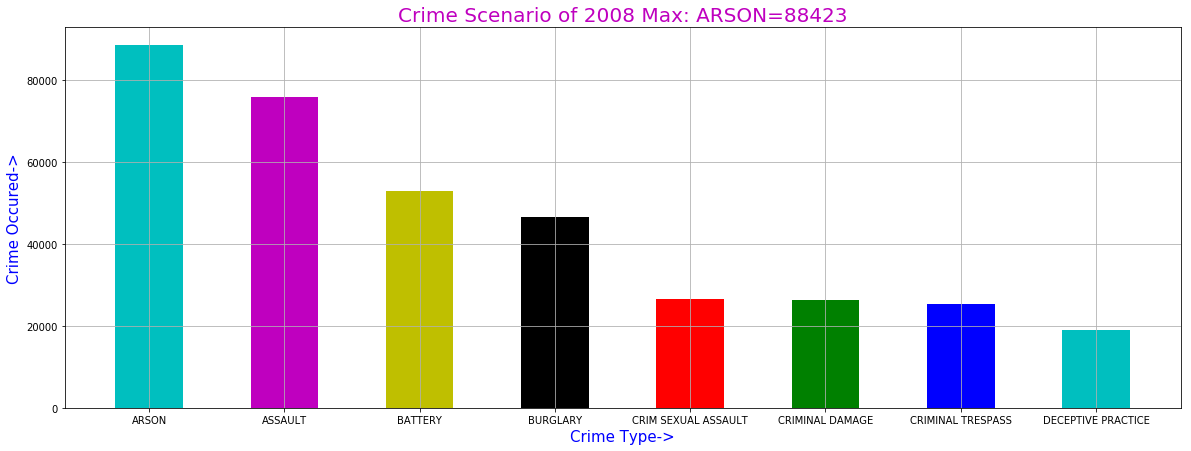

In [168]:
#CRIME scenario of 2008
c08=c0811smooth[c0811smooth['Year']==2008]
c08=c08[c08.columns.tolist()[1:]]
c08.head()
c08arr=np.array(c08['Primary Type'])
c08u=np.unique(c08arr)
c08key=np.unique(np.array(np.array(c08['Primary Type'])))
c08val=np.array(c08['Primary Type'].value_counts().values)
print(c08u[:8])
print(c08val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2008 Max: {}={}".format(c08u[:8][0],c08val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c08u[:8],c08val[:8],color=color,width=0.5)

### 2009

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[80843 68369 47663 43452 26720 25569 22834 15952]


<BarContainer object of 8 artists>

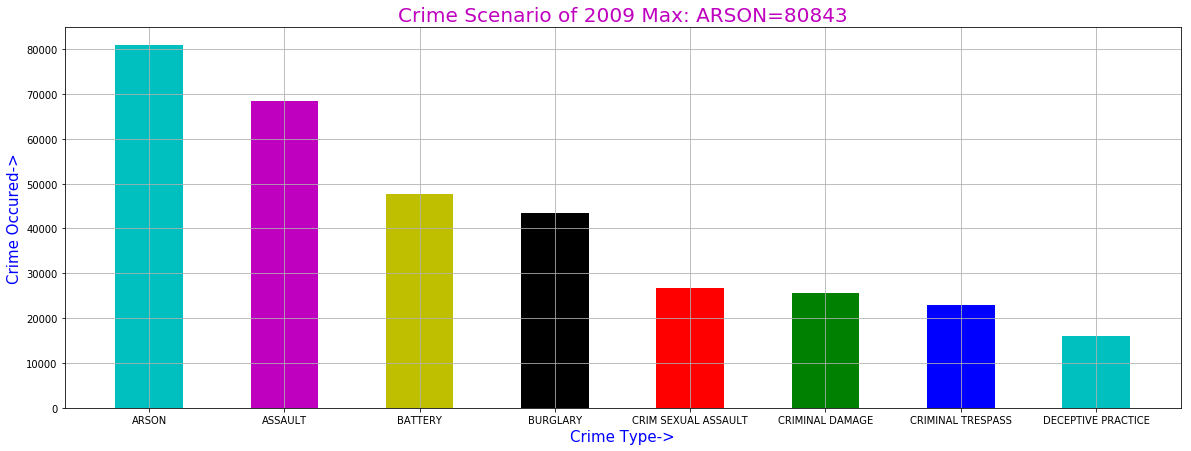

In [169]:
#CRIME scenario of 2009
c09=c0811smooth[c0811smooth['Year']==2009]
c09=c09[c09.columns.tolist()[1:]]
c09.head()
c09arr=np.array(c09['Primary Type'])
c09u=np.unique(c09arr)
c09key=np.unique(np.array(np.array(c09['Primary Type'])))
c09val=np.array(c09['Primary Type'].value_counts().values)
print(c09u[:8])
print(c09val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2009 Max: {}={}".format(c09u[:8][0],c09val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c09u[:8],c09val[:8],color=color,width=0.5)

### 2010

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[46049 42557 28111 25688 15388 14062 13900 10848]


<BarContainer object of 8 artists>

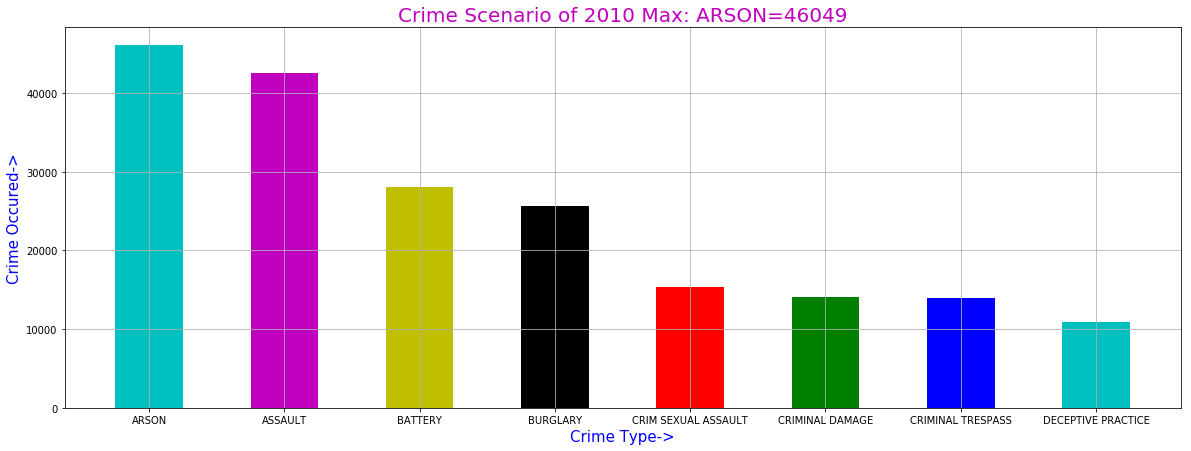

In [170]:
#CRIME scenario of 2010
c10=c0811smooth[c0811smooth['Year']==2010]
c10=c10[c10.columns.tolist()[1:]]
c10.head()
c10arr=np.array(c10['Primary Type'])
c10u=np.unique(c10arr)
c10key=np.unique(np.array(np.array(c10['Primary Type'])))
c10val=np.array(c10['Primary Type'].value_counts().values)
print(c10u[:8])
print(c10val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2010 Max: {}={}".format(c10u[:8][0],c10val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c10u[:8],c10val[:8],color=color,width=0.5)

### 2011

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'DECEPTIVE PRACTICE' 'KIDNAPPING' 'MOTOR VEHICLE THEFT']
[193 108  85  44  25  24  17  12]


<BarContainer object of 8 artists>

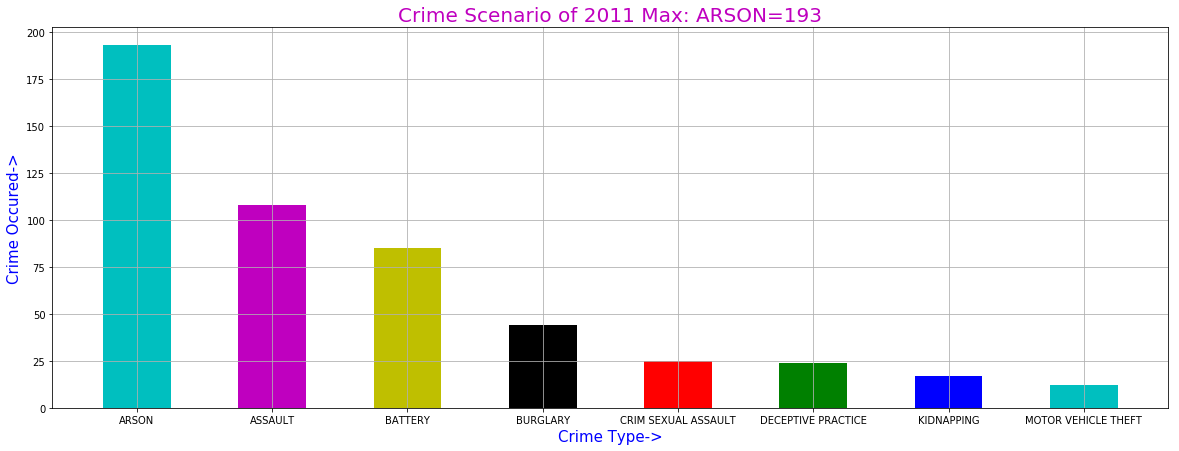

In [171]:
#CRIME scenario of 2011
c11=c0811smooth[c0811smooth['Year']==2011]
c11=c11[c11.columns.tolist()[1:]]
c11.head()
c11arr=np.array(c11['Primary Type'])
c11u=np.unique(c11arr)
c11key=np.unique(np.array(np.array(c11['Primary Type'])))
c11val=np.array(c11['Primary Type'].value_counts().values)
print(c11u[:8])
print(c11val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2011 Max: {}={}".format(c11u[:8][0],c11val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c11u[:8],c11val[:8],color=color,width=0.5)

### 2012

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[75438 59125 35852 35379 22836 19896 17472 16486]


<BarContainer object of 8 artists>

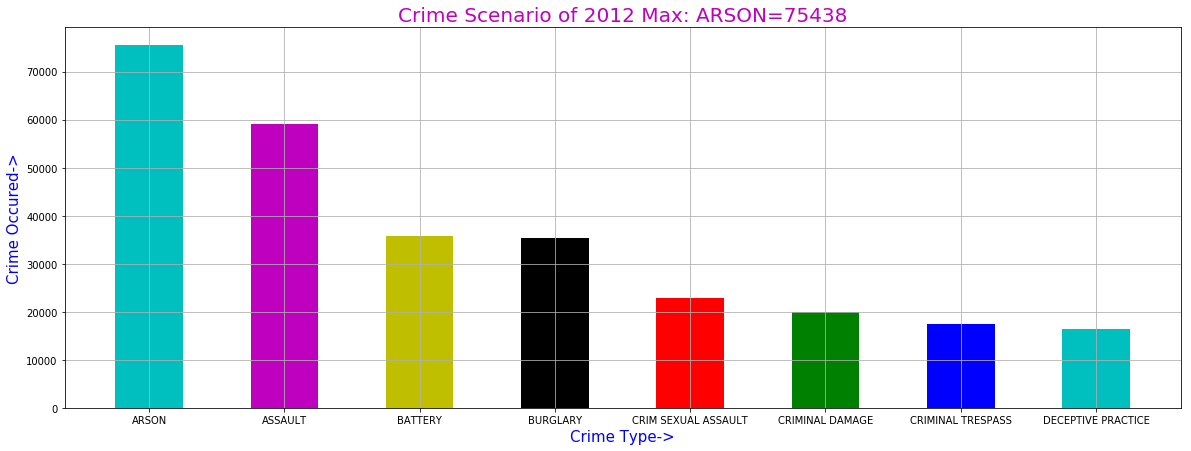

In [172]:
#CRIME scenario of 2012
c12=c1217smooth[c1217smooth['Year']==2012]
c12=c12[c12.columns.tolist()[1:]]
c12.head()
c12arr=np.array(c12['Primary Type'])
c12u=np.unique(c12arr)
c12key=np.unique(np.array(np.array(c12['Primary Type'])))
c12val=np.array(c12['Primary Type'].value_counts().values)
print(c12u[:8])
print(c12val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2012 Max: {}={}".format(c12u[:8][0],c12val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c12u[:8],c12val[:8],color=color,width=0.5)

### 2013

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[71493 53984 34128 30851 17965 17965 17881 13127]


<BarContainer object of 8 artists>

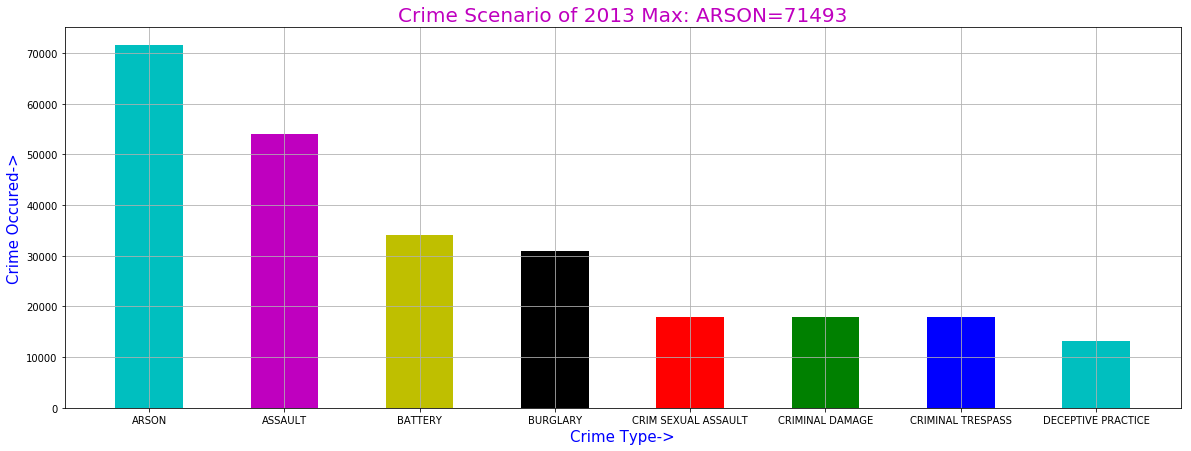

In [173]:
#CRIME scenario of 2013
c13=c1217smooth[c1217smooth['Year']==2013]
c13=c13[c13.columns.tolist()[1:]]
c13.head()
c13arr=np.array(c13['Primary Type'])
c13u=np.unique(c13arr)
c13key=np.unique(np.array(np.array(c13['Primary Type'])))
c13val=np.array(c13['Primary Type'].value_counts().values)
print(c13u[:8])
print(c13val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2013 Max: {}={}".format(c13u[:8][0],c13val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c13u[:8],c13val[:8],color=color,width=0.5)

### 2014

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[61466 49393 28909 27783 16930 16884 14905 14541]


<BarContainer object of 8 artists>

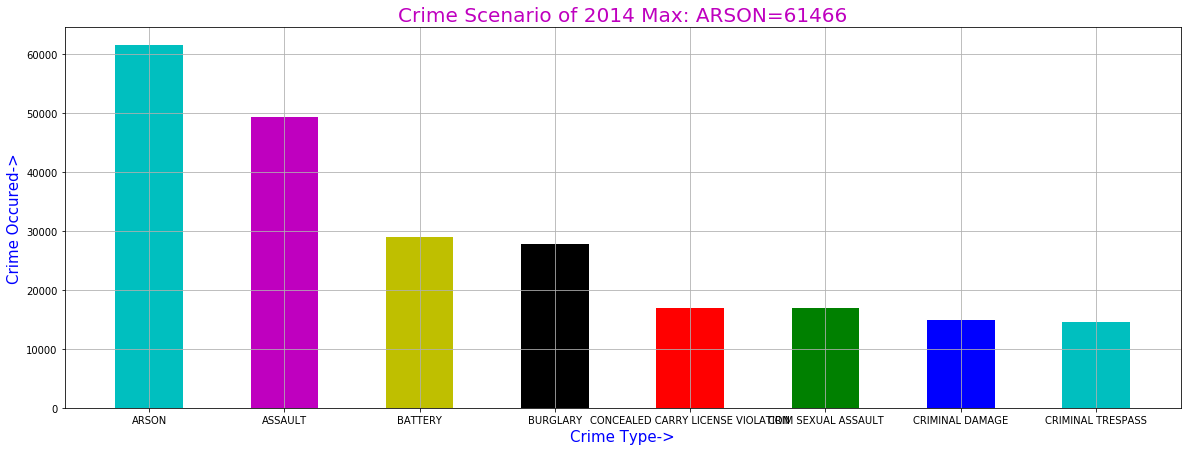

In [174]:
#CRIME scenario of 2014
c14=c1217smooth[c1217smooth['Year']==2014]
c14=c14[c14.columns.tolist()[1:]]
c14.head()
c14arr=np.array(c14['Primary Type'])
c14u=np.unique(c14arr)
c14key=np.unique(np.array(np.array(c14['Primary Type'])))
c14val=np.array(c14['Primary Type'].value_counts().values)
print(c14u[:8])
print(c14val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2014 Max: {}={}".format(c14u[:8][0],c14val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c14u[:8],c14val[:8],color=color,width=0.5)

### 2015

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[22815 21252 11569 11060  7701  7376  5993  4923]


<BarContainer object of 8 artists>

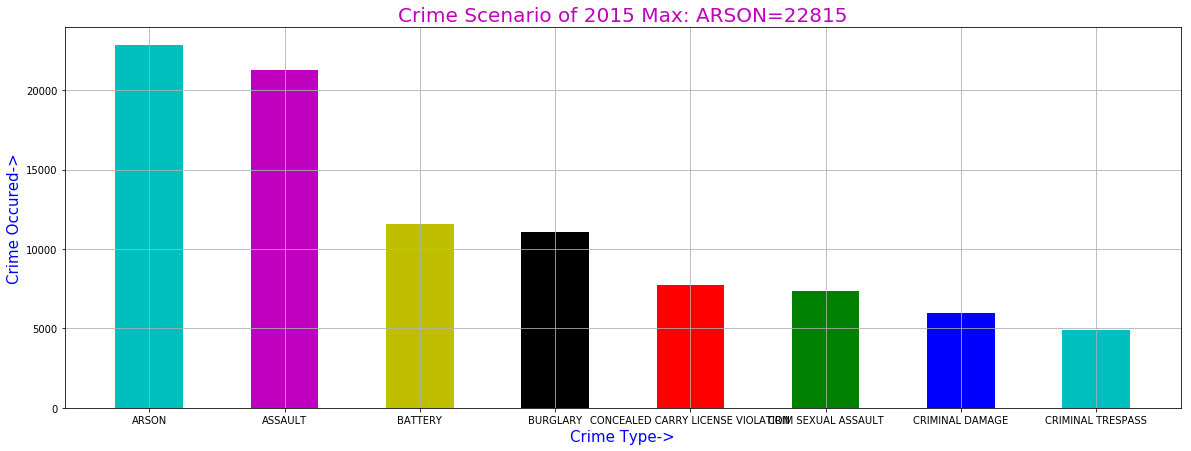

In [175]:
#CRIME scenario of 2015
c15=c1217smooth[c1217smooth['Year']==2015]
c15=c15[c15.columns.tolist()[1:]]
c15.head()
c15arr=np.array(c15['Primary Type'])
c15u=np.unique(c15arr)
c15key=np.unique(np.array(np.array(c15['Primary Type'])))
c15val=np.array(c15['Primary Type'].value_counts().values)
print(c15u[:8])
print(c15val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2015 Max: {}={}".format(c15u[:8][0],c15val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c15u[:8],c15val[:8],color=color,width=0.5)

### 2016

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[5512 5071 2976 1928 1643 1469 1305 1277]


<BarContainer object of 8 artists>

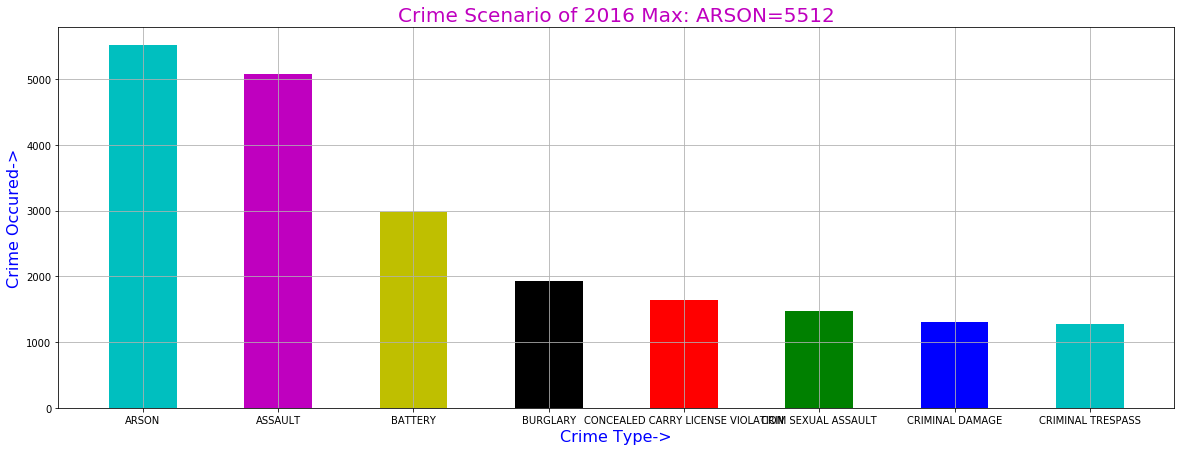

In [176]:
#CRIME scenario of 2016
c16=c1217smooth[c1217smooth['Year']==2016]
c16=c16[c16.columns.tolist()[1:]]
c16.head()
c16arr=np.array(c16['Primary Type'])
c16u=np.unique(c16arr)
c16key=np.unique(np.array(np.array(c16['Primary Type'])))
c16val=np.array(c16['Primary Type'].value_counts().values)
print(c16u[:8])
print(c16val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2016 Max: {}={}".format(c16u[:8][0],c16val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=16,color='b')
plt.ylabel("Crime Occured->",fontsize=16,color='b')
plt.grid()
plt.bar(c16u[:8],c16val[:8],color=color,width=0.5)

### 2017

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[80843 68369 47663 43452 26720 25569 22834 15952]


<BarContainer object of 28 artists>

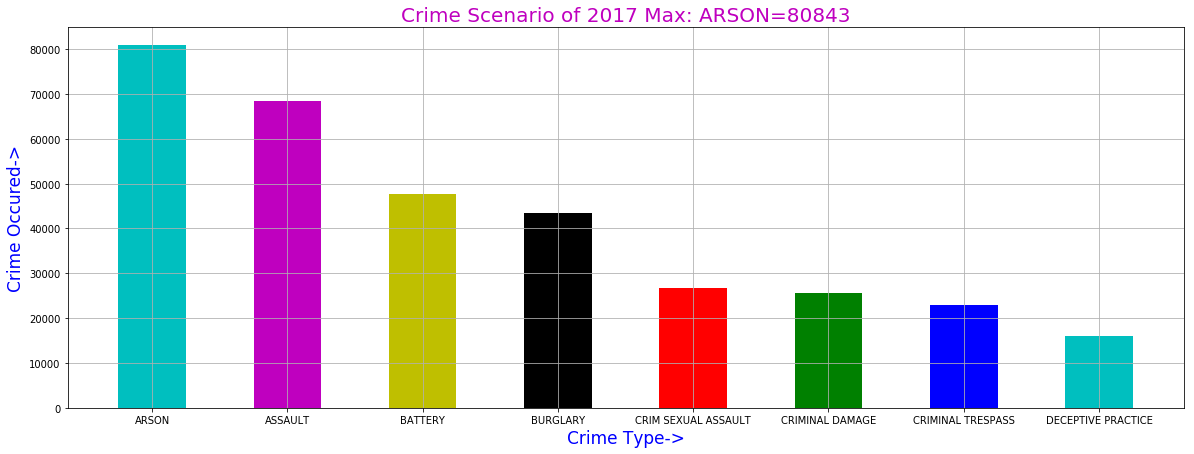

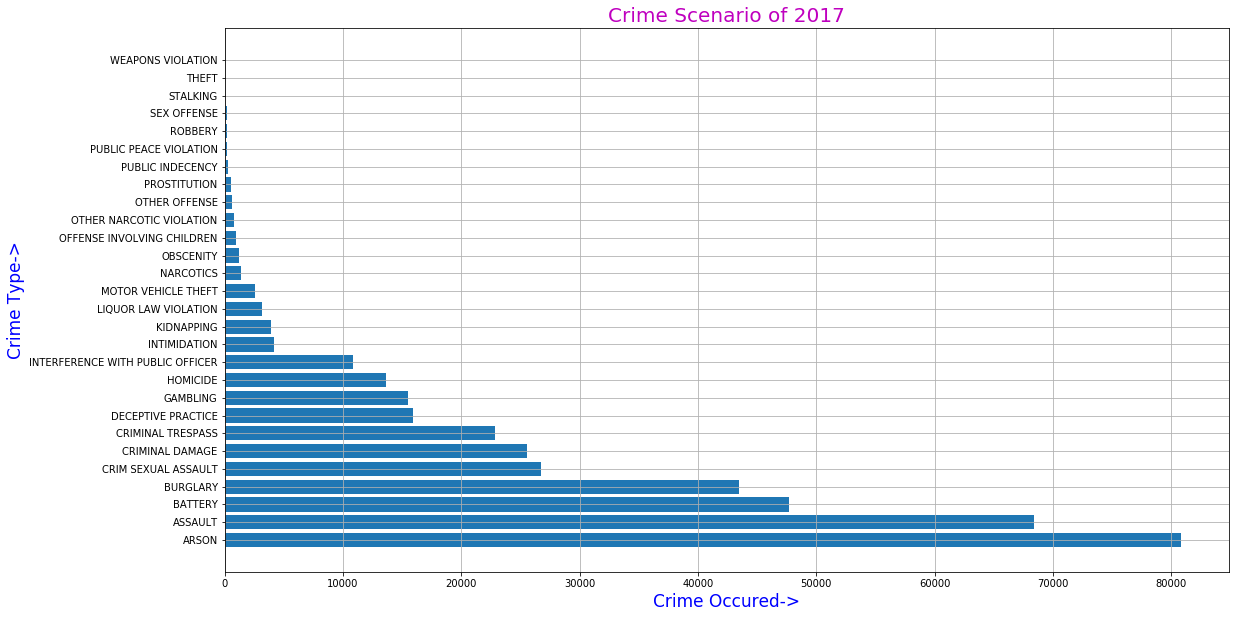

In [177]:
#CRIME scenario of 2017
c17=c0811smooth[c0811smooth['Year']==2009]
c17=c17[c17.columns.tolist()[1:]]
c17.head()
c17arr=np.array(c17['Primary Type'])
c17u=np.unique(c17arr)
c17key=np.unique(np.array(np.array(c17['Primary Type'])))
c17val=np.array(c17['Primary Type'].value_counts().values)
print(c17u[:8])
print(c17val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2017 Max: {}={}".format(c17u[:8][0],c17val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=17,color='b')
plt.ylabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.bar(c17u[:8],c17val[:8],color=color,width=0.5)
plt.figure(figsize=(18,10))
plt.title("Crime Scenario of 2017",fontsize=20,color='m')
plt.ylabel("Crime Type->",fontsize=17,color='b')
plt.xlabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.barh(c17u,c17val)

### 2018

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[65120 49790 27810 20384 18864 17152 13151 11733]


<BarContainer object of 32 artists>

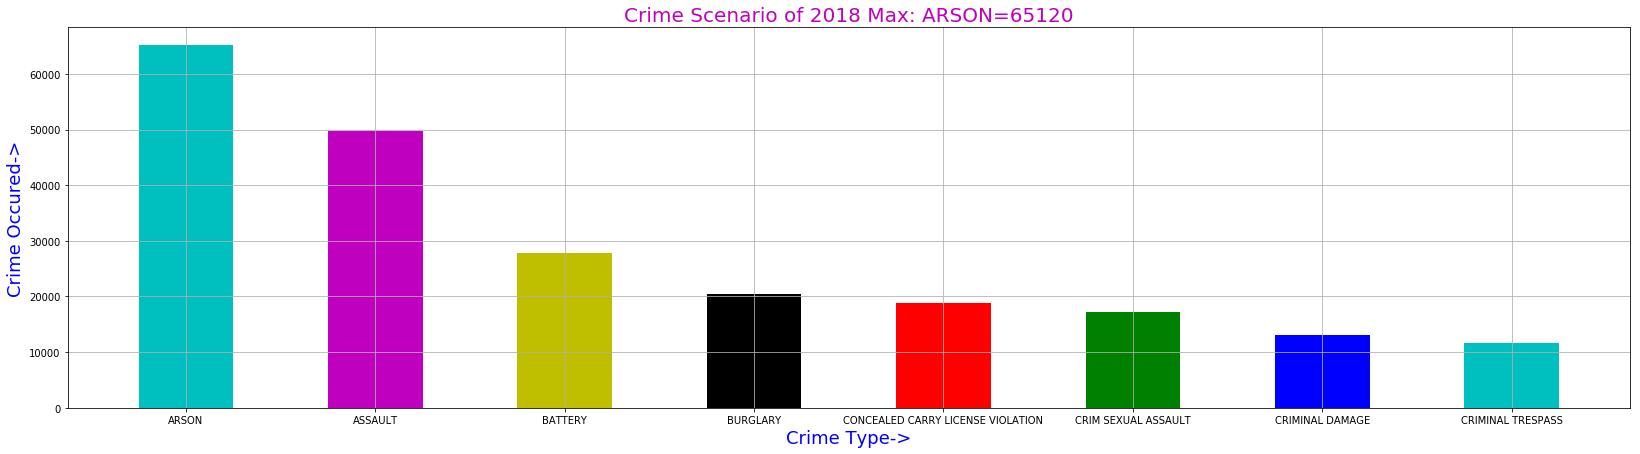

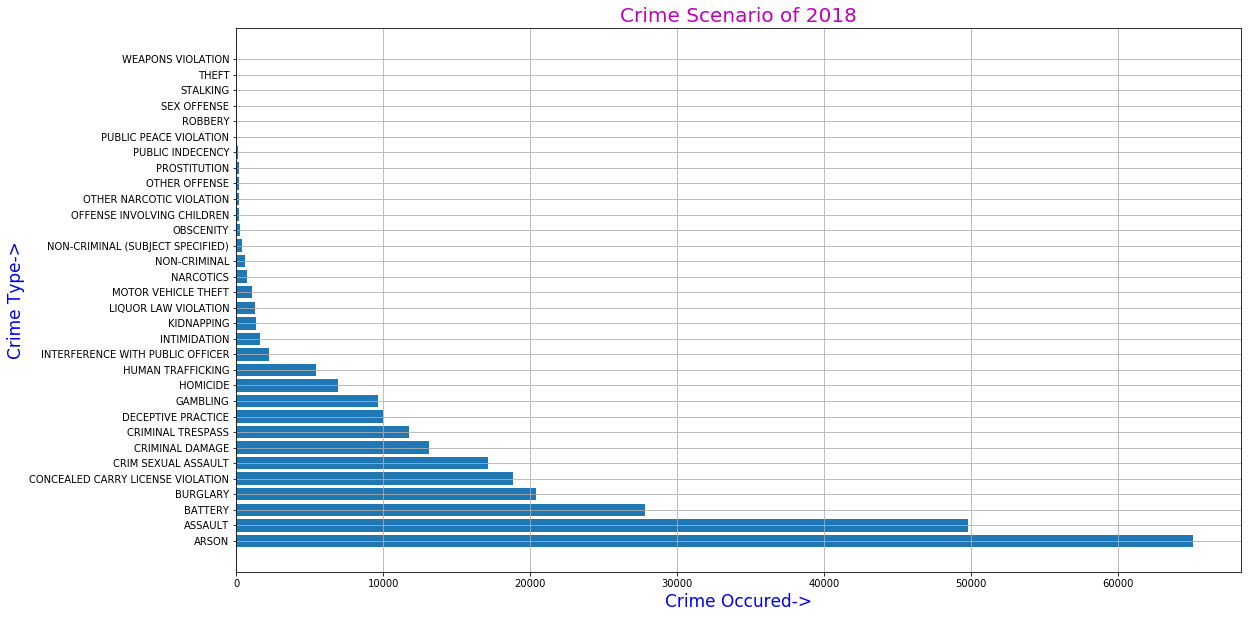

In [178]:
#CRIME scenario of 2018
c18=c1719[c1719['Year']==2018]
c18=c18[c18.columns.tolist()[1:]]
c18.head()
c18arr=np.array(c18['Primary Type'])
c18u=np.unique(c18arr)
c18key=np.unique(np.array(np.array(c18['Primary Type'])))
c18val=np.array(c18['Primary Type'].value_counts().values)
print(c18u[:8])
print(c18val[:8])
color='cmykrgb'
plt.figure(figsize=(28,7))
plt.title("Crime Scenario of 2018 Max: {}={}".format(c18u[:8][0],c18val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=18,color='b')
plt.ylabel("Crime Occured->",fontsize=18,color='b')
plt.grid()
plt.bar(c18u[:8],c18val[:8],color=color,width=0.5)

plt.figure(figsize=(18,10))
plt.title("Crime Scenario of 2018",fontsize=20,color='m')
plt.ylabel("Crime Type->",fontsize=17,color='b')
plt.xlabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.barh(c18u,c18val)

### 2019

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[19242 16158  8467  6819  6017  5651  4974  3034]


<BarContainer object of 31 artists>

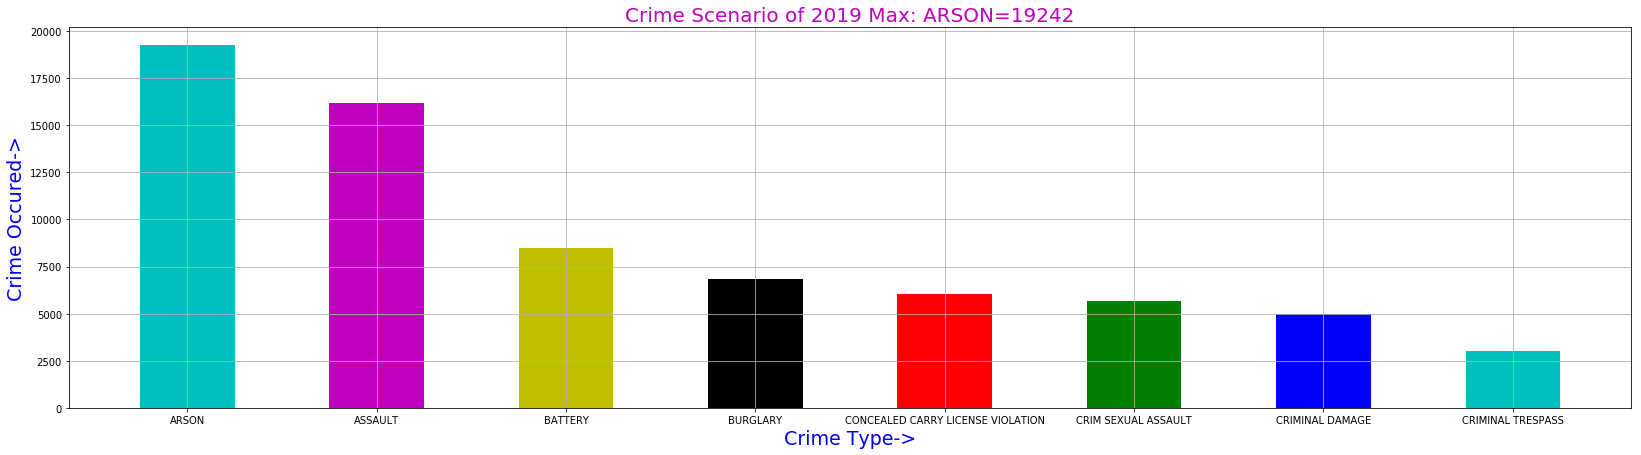

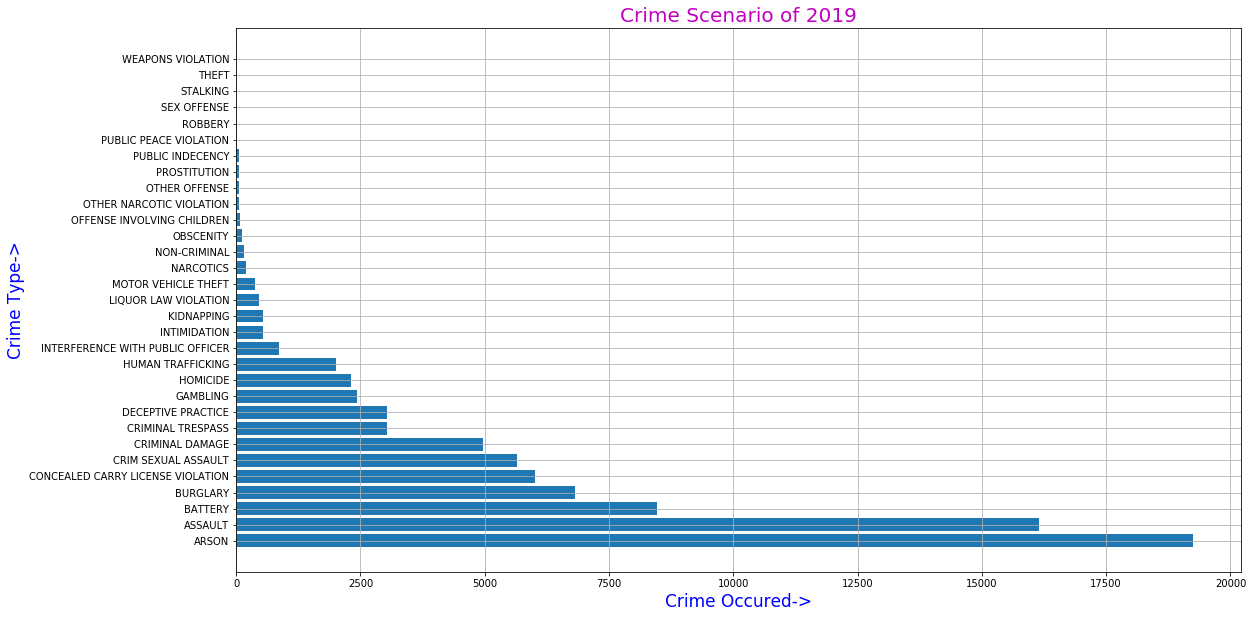

In [179]:
#CRIME scenario of 2019
c19=c1719[c1719['Year']==2019]
c19=c19[c19.columns.tolist()[1:]]
c19.head()
c19arr=np.array(c19['Primary Type'])
c19u=np.unique(c19arr)
c19key=np.unique(np.array(np.array(c19['Primary Type'])))
c19val=np.array(c19['Primary Type'].value_counts().values)
print(c19u[:8])
print(c19val[:8])
color='cmykrgb'
plt.figure(figsize=(28,7))
plt.title("Crime Scenario of 2019 Max: {}={}".format(c19u[:8][0],c19val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=19,color='b')
plt.ylabel("Crime Occured->",fontsize=19,color='b')
plt.grid()
plt.bar(c19u[:8],c19val[:8],color=color,width=0.5)

plt.figure(figsize=(18,10))
plt.title("Crime Scenario of 2019",fontsize=20,color='m')
plt.ylabel("Crime Type->",fontsize=17,color='b')
plt.xlabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.barh(c19u,c19val)

### Graphical plot of the top 8 crimes from 2012-2019

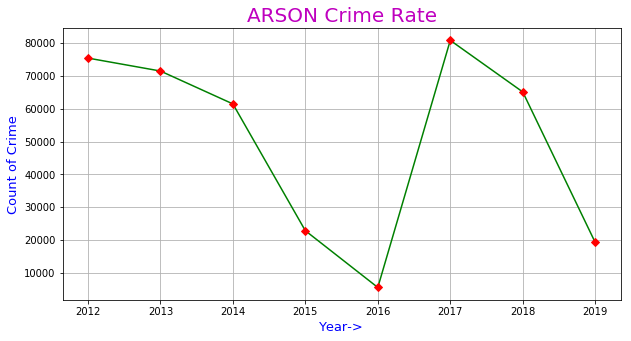

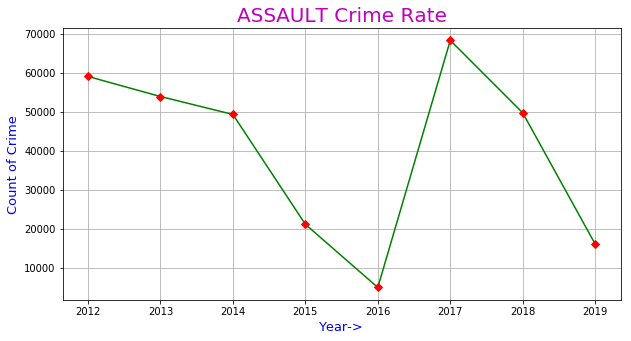

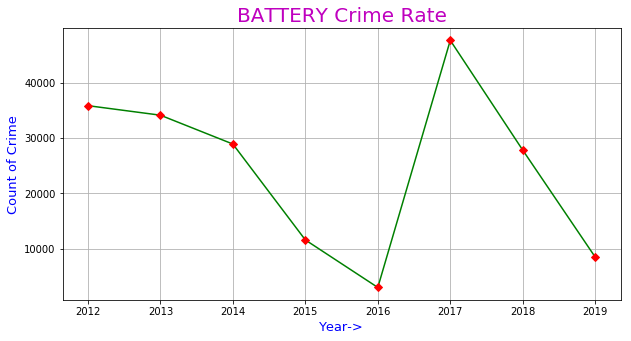

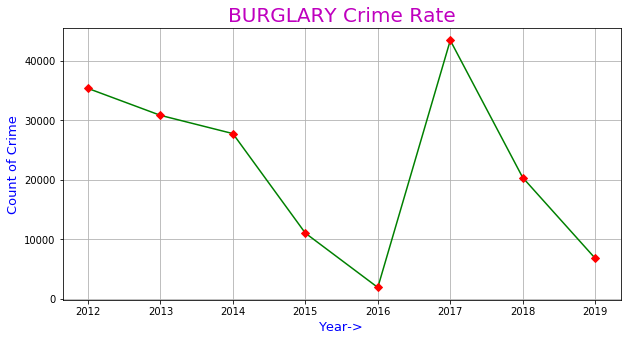

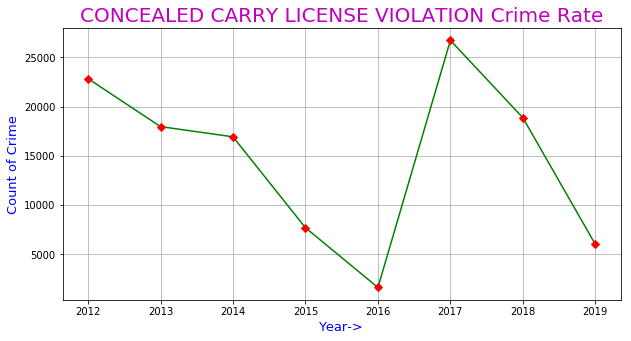

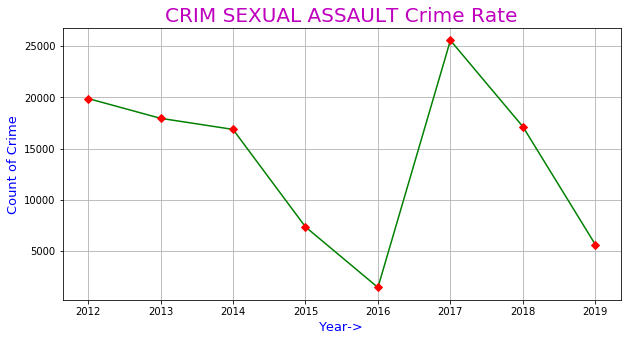

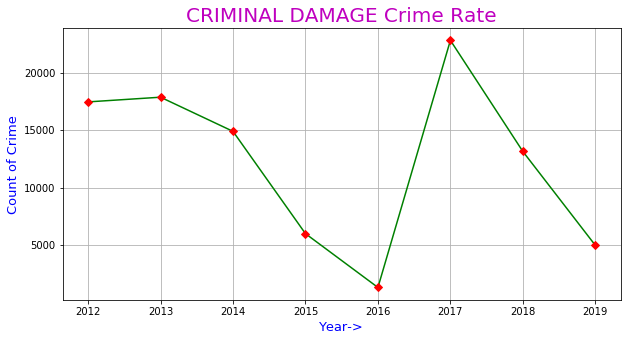

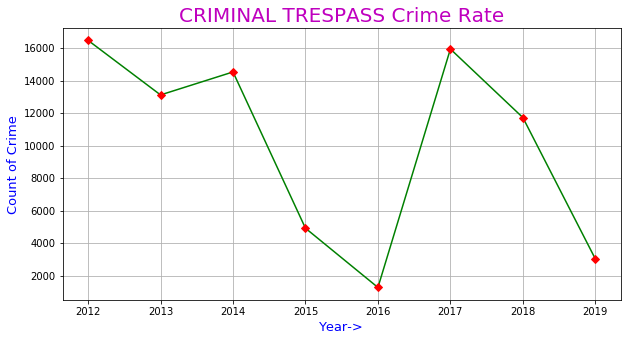

In [180]:
crmyr=['2019','2018','2017','2016','2015','2014','2013','2012']
crm=[c19val[:8][0],c18val[:8][0],c17val[:8][0],c16val[:8][0],c15val[:8][0],c14val[:8][0],c13val[:8][0],c12val[:8][0]]
for i in range(len(c19u[:8])):
    plt.figure(figsize=(10,5))
    crmyr=['2019','2018','2017','2016','2015','2014','2013','2012']
    crm=[c19val[:8][i],c18val[:8][i],c17val[:8][i],c16val[:8][i],c15val[:8][i],c14val[:8][i],c13val[:8][i],c12val[:8][i]]
    plt.title("{} Crime Rate".format(c19u[:8][i]),fontsize=20,color="m")
    plt.xlabel("Year->",fontsize=13,color="b")
    plt.ylabel("Count of Crime",fontsize=13,color="b")
    plt.grid()
    plt.plot(crmyr[::-1],crm[::-1],"g")
    plt.plot(crmyr[::-1],crm[::-1],"Dr")
    plt.savefig("C:/Users/HP/Desktop/mlpython/Project_crime/"+c19u[:8][i]+"_graph")

## Comparative Analysis of 19 years

## Crime Arrest report year wise 

In [181]:
arrestfalse=[] #not_arrested_list
arrestratiofalse=[] #not_arrested_ratio
arrestratiotrue=[] #arrested_ratio

### 2001

In [182]:
c01arreststat=c01.groupby(['Arrest']).count()['Case Number'].keys().tolist() #arrest_statistics_representing_true_false
c01arrestcount=c01.groupby(['Arrest']).count()['Case Number'].values.tolist() #arrest_count_no_of_true_or_false
print(c01arreststat)
print(c01arrestcount)

[False, True]
[343103, 141843]


In [183]:
arrestfalse.append(c01arrestcount[0])
arrestratiofalse.append((c01arrestcount[0]/sum(c01arrestcount))*100)
arrestratiotrue.append((c01arrestcount[1]/sum(c01arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103]
[70.75076400258999]
[29.249235997410022]


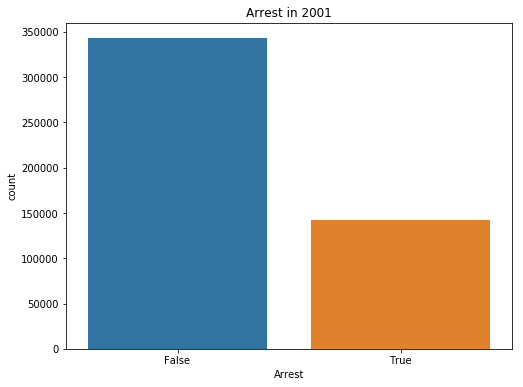

In [184]:
#arrest plot in 2001
plt.figure(figsize=(8,6))
plt.title("Arrest in 2001")
sns.countplot(c01['Arrest'])

### 2002

In [185]:
c02arreststat=c02.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c02arrestcount=c02.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c02arreststat)
print(c02arrestcount)

[False, True]
[343117, 141126]


In [186]:
arrestfalse.append(c02arrestcount[0])
arrestratiofalse.append((c02arrestcount[0]/sum(c02arrestcount))*100)
arrestratiotrue.append((c02arrestcount[1]/sum(c02arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117]
[70.75076400258999, 70.85636756752291]
[29.249235997410022, 29.143632432477084]


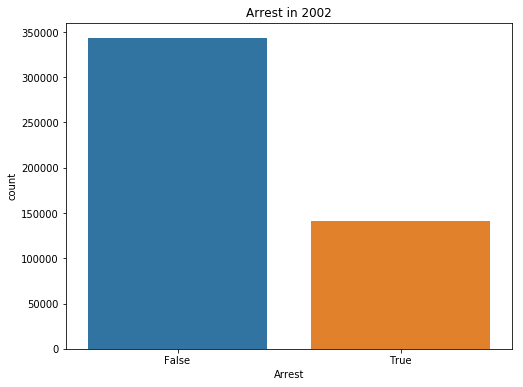

In [187]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2002")
sns.countplot(c02['Arrest'])

### 2003

In [188]:
c03arreststat=c03.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c03arrestcount=c03.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c03arreststat)
print(c03arrestcount)

[False, True]
[53455, 24559]


In [189]:
arrestfalse.append(c03arrestcount[0])
arrestratiofalse.append((c03arrestcount[0]/sum(c03arrestcount))*100)
arrestratiotrue.append((c03arrestcount[1]/sum(c03arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455]
[70.75076400258999, 70.85636756752291, 68.51975286487041]
[29.249235997410022, 29.143632432477084, 31.48024713512959]


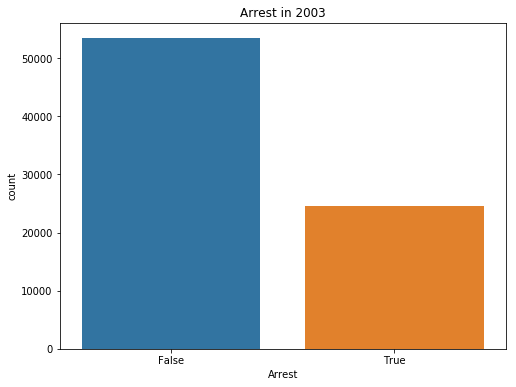

In [190]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2003")
sns.countplot(c03['Arrest'])

### 2004

In [191]:
c04arreststat=c04.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c04arrestcount=c04.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c04arreststat)
print(c04arrestcount)

[False, True]
[1122, 249]


In [192]:
arrestfalse.append(c04arrestcount[0])
arrestratiofalse.append((c04arrestcount[0]/sum(c04arrestcount))*100)
arrestratiotrue.append((c04arrestcount[1]/sum(c04arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546]


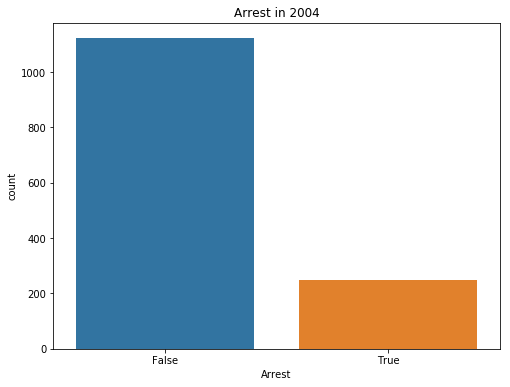

In [193]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2004")
sns.countplot(c04['Arrest'])

### 2005

In [194]:
c05arreststat=c05.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c05arrestcount=c05.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c05arreststat)
print(c05arrestcount)

[False, True]
[3737, 538]


In [195]:
arrestfalse.append(c05arrestcount[0])
arrestratiofalse.append((c05arrestcount[0]/sum(c05arrestcount))*100)
arrestratiotrue.append((c05arrestcount[1]/sum(c05arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426]


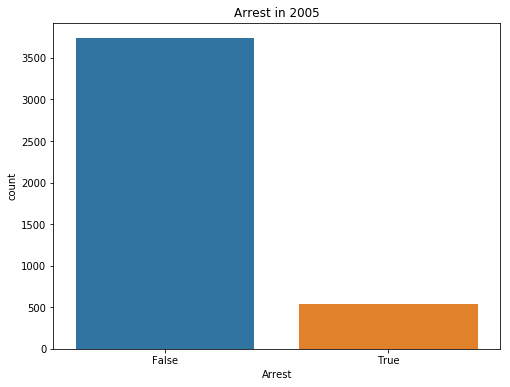

In [196]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2005")
sns.countplot(c05['Arrest'])

### 2006

In [197]:
c06arreststat=c06.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c06arrestcount=c06.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c06arreststat)
print(c06arrestcount)

[False, True]
[476390, 216765]


In [198]:
arrestfalse.append(c06arrestcount[0])
arrestratiofalse.append((c06arrestcount[0]/sum(c06arrestcount))*100)
arrestratiotrue.append((c06arrestcount[1]/sum(c06arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647]


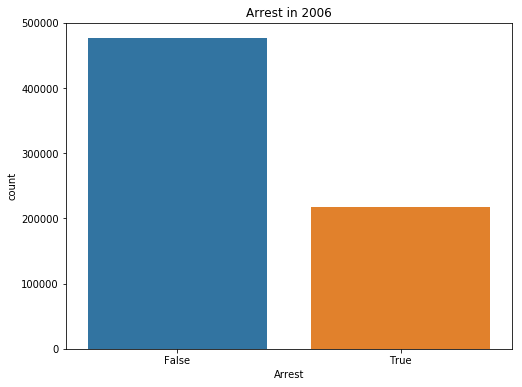

In [199]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2006")
sns.countplot(c06['Arrest'])

### 2007

In [200]:
c07arreststat=c07.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c07arrestcount=c07.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c07arreststat)
print(c07arrestcount)

[False, True]
[239864, 111280]


In [201]:
arrestfalse.append(c07arrestcount[0])
arrestratiofalse.append((c07arrestcount[0]/sum(c07arrestcount))*100)
arrestratiotrue.append((c07arrestcount[1]/sum(c07arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718]


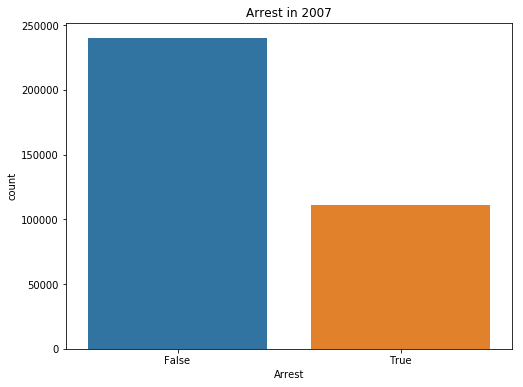

In [202]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2007")
sns.countplot(c07['Arrest'])

### 2008

In [203]:
c08arreststat=c0811[c0811['Year']==2008].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c08arrestcount=c0811[c0811['Year']==2008].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c08arreststat)
print(c08arrestcount)

[False, True]
[316684, 109705]


In [204]:
arrestfalse.append(c08arrestcount[0])
arrestratiofalse.append((c08arrestcount[0]/sum(c08arrestcount))*100)
arrestratiotrue.append((c08arrestcount[1]/sum(c08arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257]


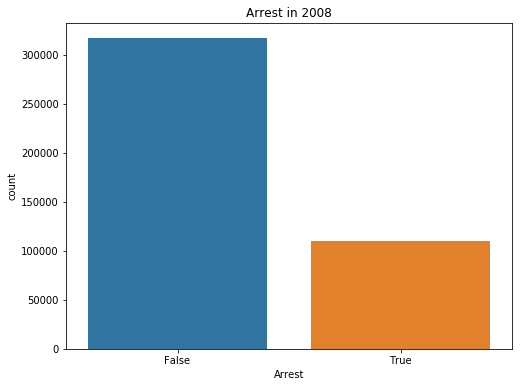

In [205]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2008")
sns.countplot(c08['Arrest'])

### 2009

In [206]:
c09arreststat=c0811[c0811['Year']==2009].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c09arrestcount=c0811[c0811['Year']==2009].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c09arreststat)
print(c09arrestcount)

[False, True]
[281168, 110427]


In [207]:
arrestfalse.append(c09arrestcount[0])
arrestratiofalse.append((c09arrestcount[0]/sum(c09arrestcount))*100)
arrestratiotrue.append((c09arrestcount[1]/sum(c09arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474]


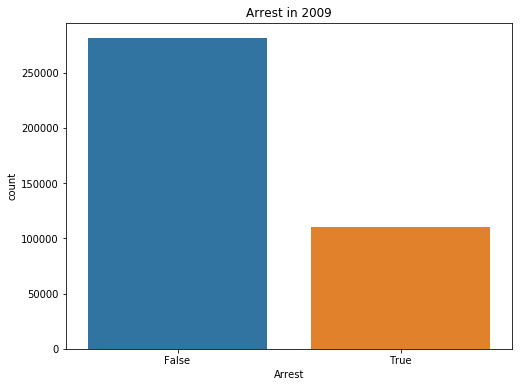

In [208]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2009")
sns.countplot(c09['Arrest'])

### 2010

In [209]:
c10arreststat=c0811[c0811['Year']==2010].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c10arrestcount=c0811[c0811['Year']==2010].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c10arreststat)
print(c10arrestcount)

[False, True]
[165528, 64525]


In [210]:
arrestfalse.append(c10arrestcount[0])
arrestratiofalse.append((c10arrestcount[0]/sum(c10arrestcount))*100)
arrestratiotrue.append((c10arrestcount[1]/sum(c10arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924]


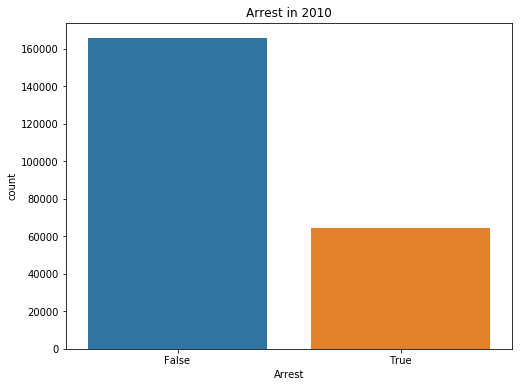

In [211]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2010")
sns.countplot(c10['Arrest'])

### 2011

In [212]:
c11arreststat=c0811[c0811['Year']==2011].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c11arrestcount=c0811[c0811['Year']==2011].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c11arreststat)
print(c11arrestcount)

[False, True]
[469, 66]


In [213]:
arrestfalse.append(c11arrestcount[0])
arrestratiofalse.append((c11arrestcount[0]/sum(c11arrestcount))*100)
arrestratiotrue.append((c11arrestcount[1]/sum(c11arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084]


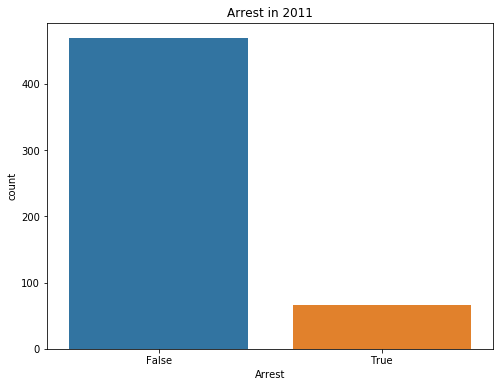

In [214]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2011")
sns.countplot(c11['Arrest'])

### 2012

In [215]:
c12arreststat=c1217[c1217['Year']==2012].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c12arrestcount=c1217[c1217['Year']==2012].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c12arreststat)
print(c12arrestcount)

[False, True]
[244547, 90168]


In [216]:
arrestfalse.append(c12arrestcount[0])
arrestratiofalse.append((c12arrestcount[0]/sum(c12arrestcount))*100)
arrestratiotrue.append((c12arrestcount[1]/sum(c12arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698]


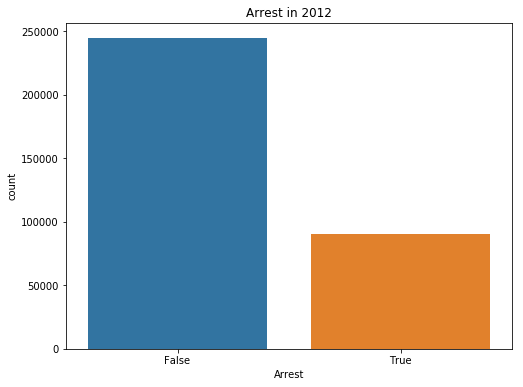

In [217]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2012")
sns.countplot(c12['Arrest'])

### 2013

In [218]:
c13arreststat=c1217[c1217['Year']==2013].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c13arrestcount=c1217[c1217['Year']==2013].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c13arreststat)
print(c13arrestcount)

[False, True]
[219764, 85974]


In [219]:
arrestfalse.append(c13arrestcount[0])
arrestratiofalse.append((c13arrestcount[0]/sum(c13arrestcount))*100)
arrestratiotrue.append((c13arrestcount[1]/sum(c13arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887]


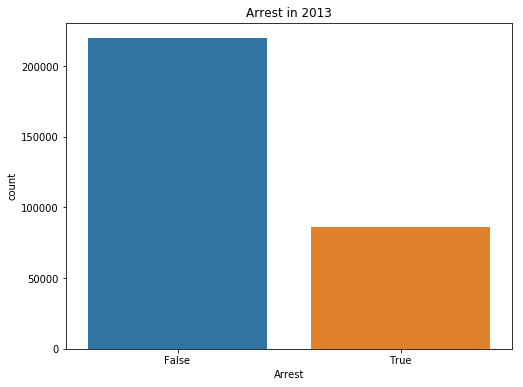

In [220]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2013")
sns.countplot(c13['Arrest'])

### 2014

In [221]:
c14arreststat=c1217[c1217['Year']==2014].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c14arrestcount=c1217[c1217['Year']==2014].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c14arreststat)
print(c14arrestcount)

[False, True]
[194532, 78690]


In [222]:
arrestfalse.append(c14arrestcount[0])
arrestratiofalse.append((c14arrestcount[0]/sum(c14arrestcount))*100)
arrestratiotrue.append((c14arrestcount[1]/sum(c14arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614]


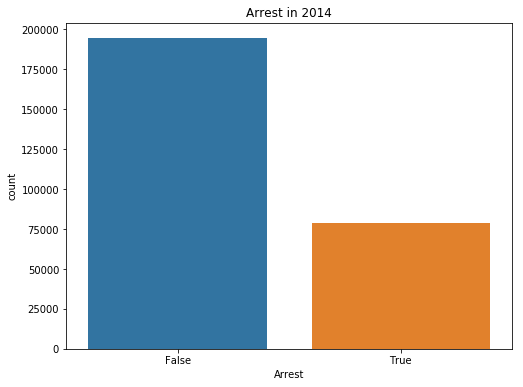

In [223]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2014")
sns.countplot(c14['Arrest'])

### 2015

In [224]:
c15arreststat=c1217[c1217['Year']==2015].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c15arrestcount=c1217[c1217['Year']==2015].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c15arreststat)
print(c15arrestcount)

[False, True]
[77877, 31808]


In [225]:
arrestfalse.append(c15arrestcount[0])
arrestratiofalse.append((c15arrestcount[0]/sum(c15arrestcount))*100)
arrestratiotrue.append((c15arrestcount[1]/sum(c15arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718]


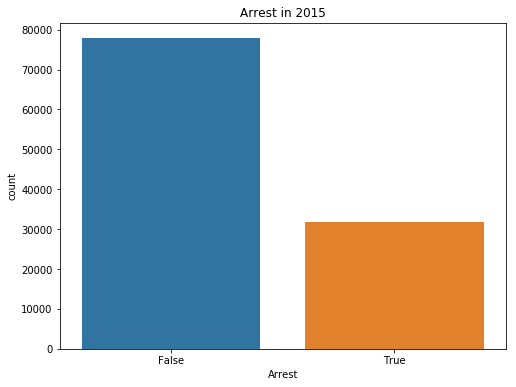

In [226]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2015")
sns.countplot(c15['Arrest'])

### 2016

In [227]:
c16arreststat=c1217[c1217['Year']==2016].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c16arrestcount=c1217[c1217['Year']==2016].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c16arreststat)
print(c16arrestcount)

[False, True]
[19926, 5289]


In [228]:
arrestfalse.append(c16arrestcount[0])
arrestratiofalse.append((c16arrestcount[0]/sum(c16arrestcount))*100)
arrestratiotrue.append((c16arrestcount[1]/sum(c16arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877, 19926]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929, 79.02439024390245]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718, 20.975609756097562]


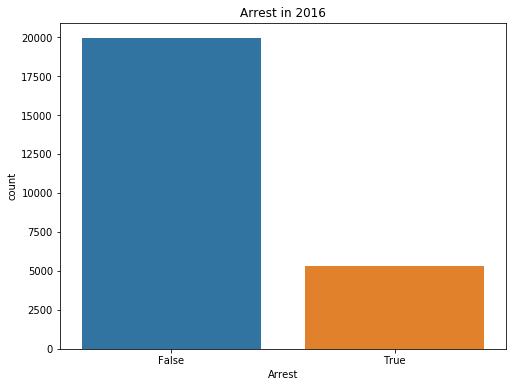

In [229]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2016")
sns.countplot(c16['Arrest'])

### 2017

In [230]:
c17arreststat=c1719[c1719['Year']==2017].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c17arrestcount=c1719[c1719['Year']==2017].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c17arreststat)
print(c17arrestcount)

[False, True]
[55807, 12461]


In [231]:
arrestfalse.append(c17arrestcount[0])
arrestratiofalse.append((c17arrestcount[0]/sum(c17arrestcount))*100)
arrestratiotrue.append((c17arrestcount[1]/sum(c17arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877, 19926, 55807]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929, 79.02439024390245, 81.74693853635672]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718, 20.975609756097562, 18.253061463643288]


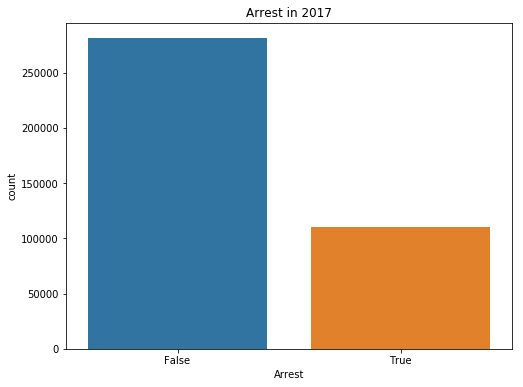

In [232]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2017")
sns.countplot(c17['Arrest'])

### 2018

In [233]:
c18arreststat=c1719[c1719['Year']==2018].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c18arrestcount=c1719[c1719['Year']==2018].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c18arreststat)
print(c18arrestcount)

[False, True]
[213799, 52880]


In [234]:
arrestfalse.append(c18arrestcount[0])
arrestratiofalse.append((c18arrestcount[0]/sum(c18arrestcount))*100)
arrestratiotrue.append((c18arrestcount[1]/sum(c18arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877, 19926, 55807, 213799]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929, 79.02439024390245, 81.74693853635672, 80.17091709508435]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718, 20.975609756097562, 18.253061463643288, 19.829082904915648]


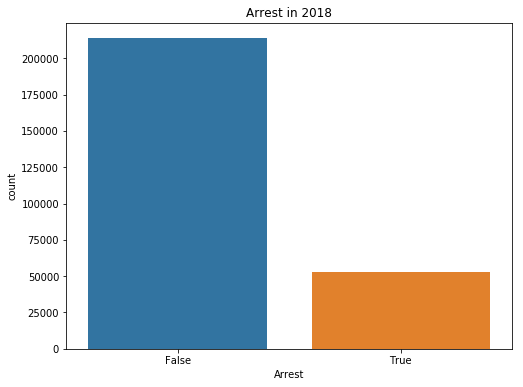

In [235]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2018")
sns.countplot(c18['Arrest'])

### 2019

In [236]:
c19arreststat=c1719[c1719['Year']==2019].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c19arrestcount=c1719[c1719['Year']==2019].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c19arreststat)
print(c19arrestcount)

[False, True]
[65704, 18064]


In [237]:
arrestfalse.append(c19arrestcount[0])
arrestratiofalse.append((c19arrestcount[0]/sum(c19arrestcount))*100)
arrestratiotrue.append((c19arrestcount[1]/sum(c19arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877, 19926, 55807, 213799, 65704]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929, 79.02439024390245, 81.74693853635672, 80.17091709508435, 78.43567949575016]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718, 20.975609756097562, 18.253061463643288, 19.829082904915648, 21.56432050424983]


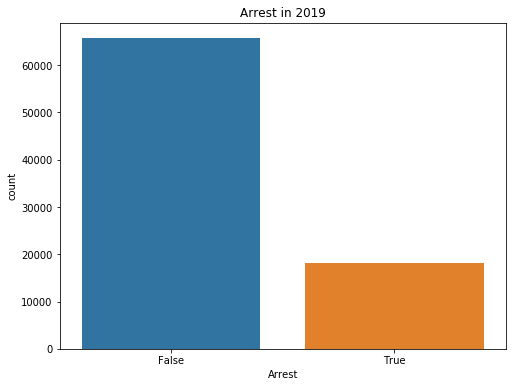

In [238]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2019")
sns.countplot(c19['Arrest'])

In [239]:
print(len(arrestfalse))
print(len(arrestratiofalse))
print(len(arrestratiotrue))
yearlist=[str(i) for i in range(2001,2020)]
print(yearlist)

19
19
19
['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


### Graphical representation of year wise crime report

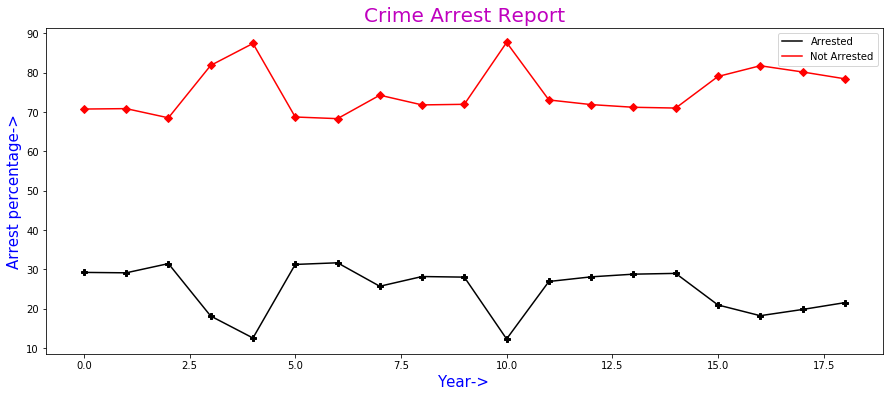

In [240]:
plt.figure(figsize=(15,6))
plt.title("Crime Arrest Report",fontsize=20,color='m')
plt.xlabel("Year->",fontsize=15,color='b')
plt.ylabel("Arrest percentage->",fontsize=15,color='b')
plt.plot(arrestratiotrue,"k",label="Arrested")
plt.plot(arrestratiotrue,"Pk")
plt.plot(arrestratiofalse,"r",label="Not Arrested")
plt.plot(arrestratiofalse,"Dr")
plt.legend(loc="upper right")
plt.savefig("C:/Users/HP/Desktop/mlpython/Project_crime/"+"Arrest_ratio_graph")

## Dataframe creation for PREDICTION

In [241]:
#arrested_count_list=arresttrue
arresttrue=[c01arrestcount[1],c02arrestcount[1],c03arrestcount[1],c04arrestcount[1],c05arrestcount[1],c06arrestcount[1],c07arrestcount[1],c08arrestcount[1],c09arrestcount[1],c10arrestcount[1],c11arrestcount[1],c12arrestcount[1],c13arrestcount[1],c14arrestcount[1],c15arrestcount[1],c16arrestcount[1],c17arrestcount[1],c18arrestcount[1],c19arrestcount[1]]
print(arresttrue)
print(len(arresttrue))

[141843, 141126, 24559, 249, 538, 216765, 111280, 109705, 110427, 64525, 66, 90168, 85974, 78690, 31808, 5289, 12461, 52880, 18064]
19


In [242]:
#prob=list of values where 0 represents arrestratio has decreased from previous year indicating crime has decreased
                    #where 1 represents arrestratio has increased from previous year indicating crime has increased
#previous=previous value of arresttrue initialised to 0 and then compared with the succeeding values to get probability
#increase or decrease in terms of 0/1
prob=[]
previous=arrestratiotrue[0]
for i in range(len(arrestratiotrue)):
    if previous>=arrestratiotrue[i]:
        prob.append(0)
    else:
        prob.append(1)
    previous=arrestratiotrue[i]
print(prob)

[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]


In [243]:
#blank list to store the efficiency ratio of arrested/total crimes
ratio=[]
for i in range(len(arrestratiotrue)):
    ratio.append(arresttrue[i]/(arrestfalse[i]+arresttrue[i]))
print(ratio)

[0.2924923599741002, 0.29143632432477085, 0.3148024713512959, 0.18161925601750548, 0.12584795321637426, 0.31272226269737646, 0.3169070238990272, 0.2572885323026626, 0.28199287529207473, 0.280478846178924, 0.1233644859813084, 0.26938738927146977, 0.2812015516553389, 0.28800755429650615, 0.28999407393900717, 0.2097560975609756, 0.1825306146364329, 0.1982908290491565, 0.21564320504249831]


In [244]:
#regdata=regression_data
regdata=pd.DataFrame({
    "Year":yearlist,
    "Cases Booked":np.array(arrestfalse)+np.array(arresttrue),
    "Not Arrested":arrestfalse,
    "Arrested":arresttrue,
    "Arrested(%)":arrestratiotrue,
    "Not Arrested(%)":arrestratiofalse,
    "Efficiency Ratio":ratio,
    "Crime Hike":prob
})

regdata.to_csv("C:/Users/HP/Desktop/mlpython/Project_crime/regdata.csv")

In [245]:
regdata.head()

,Year,Cases Booked,Not Arrested,Arrested,Arrested(%),Not Arrested(%),Efficiency Ratio,Crime Hike
0,2001,484946,343103,141843,29.249236,70.750764,0.292492,0
1,2002,484243,343117,141126,29.143632,70.856368,0.291436,0
2,2003,78014,53455,24559,31.480247,68.519753,0.314802,1
3,2004,1371,1122,249,18.161926,81.838074,0.181619,0
4,2005,4275,3737,538,12.584795,87.415205,0.125848,0


### Determining Correlation

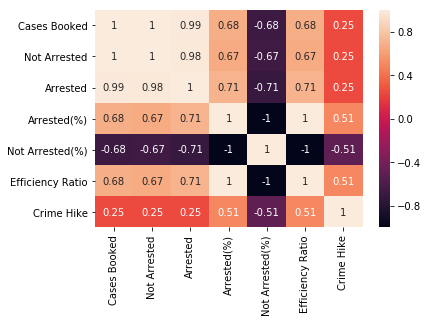

In [246]:
sns.heatmap(regdata.corr(),annot=True)

## PREDICTION using LOGISTIC REGRESSION

### Importing libraries

In [247]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

### Fitting data

In [248]:
#logmodel=object of logistic regression
logmodel = LogisticRegression()
logmodel.fit(regdata[regdata.columns.tolist()[1:len(regdata.columns.tolist())-1]],regdata[regdata.columns.tolist()[-1]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Prediction

In [249]:
#calculating mean of the efficiency ratio
meanrat=np.mean(np.array(regdata['Efficiency Ratio']))

In [250]:
#no of cases booked = bookcase
#not arrested = bookcase-bookcase*meanrat
#arrested = bookcase*meanrat
#arrested % = bookcase*meanrat/bookcase
#not arrested % = bookcase-(bookcase*meanrat/bookcase)
#efficiency ratio = meanrat
bookcase=int(input("Please enter probable number of cases booked: "))
predict_crime=logmodel.predict([[bookcase,bookcase-bookcase*meanrat,bookcase*meanrat,bookcase*meanrat/bookcase,bookcase-(bookcase*meanrat/bookcase),meanrat]])
print(predict_crime[0])
if predict_crime[0]==0:
    print("Crime rate in Chicago will decrease...")
else:
    print("Crime rate in Chicago will increase...")

Please enter probable number of cases booked: 1000000
0
Crime rate in Chicago will decrease...
